In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import json
import sys, os
sys.path.append("../../../work2/ownutils/scriptssyn") #rosamc/scriptssyn repo
sys.path.append("./bin/")
import PolAB_A_allpars
import basic
import fluxes
import glob
import pandas as pd

In [2]:
green="#c6cdad"
blue="#d3dbe4"
red="#e3cbc8"
mpl.rcParams["font.size"]=14
def tint_ax(ax):
    xmin,xmax=ax.get_xlim()
    ymin,ymax=ax.get_ylim()
    if xmax>0:
        ax.fill_between([0,xmax],ymax,color=green,zorder=1)
    if xmin<0:
        ax.fill_between([xmin,0],ymax,color=blue,zorder=1)
        ax.fill_between([xmin,0],ymin,color=red,zorder=1)
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin,ymax)
    return ax

In [4]:
filename='../../../work2/bPcycle/ashapes_compareconditions_2020_03_26.json'
ashapes=json.load(open(filename,'r'))
ashapes.keys()

dict_keys(['empty', 'any', 'difAD_difbnp', 'difAD_samebnp', 'difAD_samebnp_step12', 'difAD_samebnp_step13', 'difAD_samebnp_step23', 'difAD_samebnp_step11', 'sameAD_difbp', 'sameAD_difbp_kuonly', 'sameAD_difbnp'])

In [5]:
data1=ashapes['sameAD_difbnp']['2020_03_28_kPolconstr1000_cont']['fc1=10_fc2=10'] #TFA has a kon and a koff, and TFB has another kon and koff. Same for all three cycle states/
data2=ashapes['sameAD_difbp']['2020_03_28_kPolconstr1000_cont']['fc1=10_fc2=10'] #different kon and koff for each state and TF

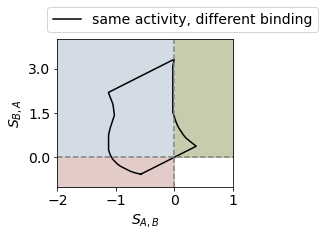

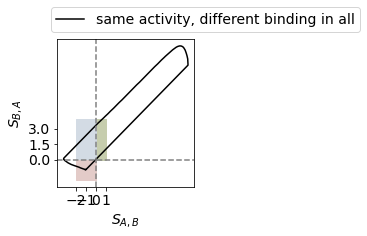

In [6]:
xlim=[-2,1]
ylim=[-1,4]
xlim0,xlim1=xlim
ylim0,ylim1=ylim

linestyles=["-","-"]
titles=["same activity, different binding","same activity, different binding in all"]

for d, data in enumerate([data1,data2]):
    fig,ax=plt.subplots(1,1,figsize=(4,3.5))
    #ax.set_title(titles[d])
    points=[[data["x"][i],data["y"][i]] for i in range(len(data["x"]))]
    patch=plt.Polygon(points,color='k')
    #ax.add_patch(patch)
    ax.plot(data["x"],data["y"],color='k',linestyle=linestyles[d],label=titles[d])
    ax.axvline(x=0,linestyle="--",color="gray")
    ax.axhline(y=0,linestyle="--",color="gray")
    if d==0:
        ax.set_xlim(xlim0,xlim1)
        ax.set_ylim(ylim0,ylim1)
    ax.fill_between([0,xlim1],0,ylim1,color=green)
    ax.fill_between([xlim0,0],0,ylim1,color=blue)
    ax.fill_between([xlim0,0],0,xlim0,color=red)
    ax.set_xlabel("$S_{A,B}$")
    ax.set_ylabel("$S_{B,A}$")
    ax.set_xticks([-2,-1,0,1])
    ax.set_yticks([0,1.5,3])

    #ax=axes[1]
    #ax.plot([-3,-2],[-3,-2],color="k",label="fc=10,fc pair=10")
    #ax.plot([-3,-2],[-3,-2],color="k",linestyle="--",label="fc=5,fc pair=5")
    ax.legend(loc="lower left",bbox_to_anchor=(-0.1,1),bbox_transform=ax.transAxes,ncol=1)
    plt.tight_layout()
    #plt.savefig("figs/boundary_sameAD_difb.pdf",bbox_inches="tight")
    plt.show()

In [3]:
def return_fullparset(parset,case):
    if case=="any":
        parset2=parset.copy()
    elif case=="difAD_difbnp":
        parset2=np.concatenate((parset[0:12],parset[12:14],parset[12:14],parset[12:14],parset[14:16],parset[14:16],parset[14:16]))
    elif case=="difADsbnp" or case=="difAD_samebnp":
        parset2=np.concatenate((parset[0:12],parset[12:14],parset[12:14],parset[12:14],parset[12:14],parset[12:14],parset[12:14]))
    elif case=="difAD_samebnp_step12":#ni,ia
        parset2=np.concatenate((parset[0:4],parset[0:3],parset[4:5],parset[5:6],parset[1:4],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8]))
    elif case=="difAD_samebnp_step13": #ni,an
        parset2=np.concatenate((parset[0:4],parset[0:3],parset[4:5],parset[0:1],parset[5:6],parset[2:4],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8]))    
    elif case=="difAD_samebnp_step42": #in,ia #4,2
        parset2=np.concatenate((parset[0:4],parset[0:2],parset[4:5],parset[3:4],parset[5:6],parset[1:4],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8]))    
    elif case=="difAD_samebnp_step43": #in,an #4,3
        parset2=np.concatenate((parset[0:4],parset[0:2],parset[4:5],parset[3:4],parset[0:1],parset[5:6],parset[2:4],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8]))    
    elif case=="difAD_samebnp_step23":#ia,an
        parset2=np.concatenate((parset[0:4],parset[4:5],parset[1:4],parset[0:1],parset[5:6],parset[2:4],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8]))    
    elif case=="difAD_samebnp_step11":
        parset2=np.concatenate((parset[0:4],parset[0:3],parset[4:5],parset[0:3],parset[5:6],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8]))
    elif case=="difAD_samebnp_step22":
        parset2=np.concatenate((parset[0:4],parset[4:5],parset[1:4],parset[5:6],parset[1:4],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8],parset[6:8]))
    elif case=="sameAD_difbp":
        parset2=np.concatenate((parset[0:8],parset[4:8],parset[8:20]))
    elif case=="sameAD_difbp_kuonly":
        kb=parset[8]
        ku1,ku2,ku3,ku4,ku5,ku6=parset[9:]
        bindingar=np.array([kb,ku1,kb,ku2,kb,ku3,kb,ku4,kb,ku5,kb,ku6])
        parset2=np.concatenate((parset[0:8],parset[4:8],bindingar))
    elif case=="sameAD_difbnp":
        parset2=np.concatenate((parset[0:8],parset[4:8],parset[8:10],parset[8:10],parset[8:10],parset[10:12],parset[10:12],parset[10:12]))
    elif case=="empty":
         parset2=np.concatenate((parset[0:8],parset[0:4],parset[8:10],parset[8:10],parset[8:10],parset[8:10],parset[8:10],parset[8:10]))
    else:
        print("unrecognised case, ", case)
        raise ValueError
    return parset2

In [4]:
import glob

In [5]:
parslist_order=['ktni0','ktin0','ktia0','ktan0','ktniA','ktinA','ktiaA','ktanA','ktniB','ktinB','ktiaB','ktanB','kbBa','kuBa','kbBi','kuBi','kbBn','kuBn','kbAa','kuAa','kbAi','kuAi','kbAn','kuAn']
flux_order_labs=['2-1','1-2','1-0','0-2','5-4','4-5','4-3','3-5','8-7','7-8','7-6','6-8','2-5','5-2','2-8','8-2','1-4','4-1','1-7','7-1','0-3','3-0','0-6','6-0']

edges=[(2,'ktia0',1),(1,'ktan0',3),(2,'ktin0',3),(3,'ktni0',2),
       (8,'ktiaA',7),(7,'ktanA',9),(8,'ktinA',9),(9,'ktniA',8),
       (5,'ktiaB',4),(4,'ktanB',6),(5,'ktinB',6),(6,'ktniB',5),
      (1,'kbBa-B',4),(4,'kuBa',1),(2,'kbBi-B',5),(5,'kuBi',2),(3,'kbBn-B',6),(6,'kuBn',3),
       (1,'kbAa-A',7),(7,'kuAa',1),(2,'kbAi-A',8),(8,'kuAi',2),(3,'kbAn-A',9),(9,'kuAn',3)]
edges_=[]
for tuple_ in edges:
    edges_.append((tuple_[0]-1,tuple_[1],tuple_[2]-1))
    
graph_edges_dict=dict()
for x in edges:
    graph_edges_dict['%s-%s'%(x[0],x[2])]=x[1]
#note that A is to the left, B is to the right
#coords=fluxes.get_G_coords_9nodes()
basiccoords={0: [0,-1],
         1: [0.,1],
         2: [-1, 0]}

dx=2.5
coords=dict()
coords[0]=basiccoords[0]
coords[1]=basiccoords[1]
coords[2]=basiccoords[2]
coords[3]=[basiccoords[0][0]+dx,basiccoords[0][1]] #B
coords[4]=[basiccoords[1][0]+dx,basiccoords[1][1]] #B
coords[5]=[basiccoords[2][0]+dx,basiccoords[2][1]] #B
coords[6]=[basiccoords[0][0]-dx,basiccoords[0][1]] #A
coords[7]=[basiccoords[1][0]-dx,basiccoords[1][1]] #A
coords[8]=[basiccoords[2][0]-dx,basiccoords[2][1]] #A


#connectstyles

#these are the labels corresponding to the flux matrix, then flattened so that it is a row
nnodes=9
flux_names_mat=np.empty((nnodes,nnodes),dtype=object)
for i in np.arange(nnodes):
    for j in np.arange(nnodes):
        flux_names_mat[i,j]='%d-%d'%(i,j)
#print(flux_names_mat)
flux_names_flat=flux_names_mat.flatten()
#print(flux_names_flat)

#names of transitions for the fluxes, appending an extension to distinguish the different TF states
#for this analysis I only look at the situation where both TFs are present, but could also look at the situation where, nothing, or only A or B are bound
all_fnames=[]
flux_order_labs_AB=[]
for i in [3]:
    if i==0:
        ext='0'
    elif i==1:
        ext='A'
    elif i==2:
        ext='B'
    else:
        ext='AB'
    all_fnames.extend(['%s.%s'%(x,ext) for x in flux_names_flat]) #add extension to the labls obtained above
    flux_order_labs_AB.extend(['%s.%s'%(x,ext) for x in flux_order_labs]) #add extension to the order
all_fnames=np.array(all_fnames)
def makeplot(parset,netJ=True,node0=2,cmap=plt.cm.Greys):
    out=basic.compute_synergy(parset,PolAB_A_allpars.interface_GRF_PolAB_A_A,fcind=10,fcpair=10,returnm=True,anystronger=True)
    print(out)
    allGslist=[]
    allG2slist=[]
    allcolorslist=[]
    fig,axes=plt.subplots(1,4,figsize=(16,3))
    titles=["0","2A","2B","AB"]
    for i in range(4):
        if i==0:
            A=0
            B=0
        elif i==1:
            A=2
            B=0
        elif i==2:
            A=0
            B=2
        else:
            A=1
            B=1
        rhos=PolAB_A_allpars.interface_rhos_GRF_PolAB_A_A(parset,np.array([B]),A)
        P=rhos/np.sum(rhos)
        J=fluxes.get_fluxes(edges_,A,B,parset,P,netJ=netJ)
        Js_ar=J.flatten()
        #print(Js_ar)
        #keep only those columns with nonzero fluxes
        mask=[]
        for col in range(nnodes*nnodes):
            if np.any(Js_ar[col]>1e-15):
                mask.append(col)
        #mat=np.log10(all_Js)[:,mask]
        Js_ar=Js_ar[mask]
        names_ar=all_fnames[mask]
        G=fluxes.get_graph_fromJarray(np.log10(Js_ar),names_ar,min_=-15)
        Gs=[G]
        G2=fluxes.get_dominant_path_G(G,node0)
        all_G2s=[G2]
        allGslist.append(Gs)
        allG2slist.append(all_G2s)
        colors_=[[G[e[0]][e[1]]["weight"] for e in G.edges()] for G in Gs]
        allcolorslist.append(colors_)
    
    vmin_nflog=min([min([min(x) for x in colors_]) for colors_ in allcolorslist])
    vmax_nflog=max([max([max(x) for x in colors_]) for colors_ in allcolorslist])
     
    color_args={"edge_cmap":cmap,"edge_vmin":vmin_nflog,"edge_vmax":vmax_nflog,"width":3}

    
    for i in range(4):
        axes[i].set_title(titles[i])
        #axes[i].set_frame_on(False)
        Gs=allGslist[i]
        all_G2s=allG2slist[i]
        colors_=allcolorslist[i]
        fluxes.plot_graphs(Gs,[axes[i]],coords=coords,dominant=all_G2s,color_lists=colors_,color_args=color_args,colord="magenta")

    cbax=fig.add_axes([1,0,0.015,0.8])
    norm=mpl.colors.Normalize(vmin=vmin_nflog,vmax=vmax_nflog)
    mpl.colorbar.ColorbarBase(cbax,cmap=cmap,norm=norm,ticks=np.arange(vmin_nflog,vmax_nflog,1),label="log$_{10}$(net flux)")
    plt.tight_layout()
    plt.show()

In [6]:
import matplotlib.colors as colors
        
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [7]:
step=0.025
col_ar=np.arange(-5,15+step,step)
row_ar=np.arange(-5,15+step,step)
#the data is in
boundaries_folder="/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-kinsynsub1/old/2020_03_15_all_kPolconstraints_1000_cont/final_results"

sameAD_difbnp


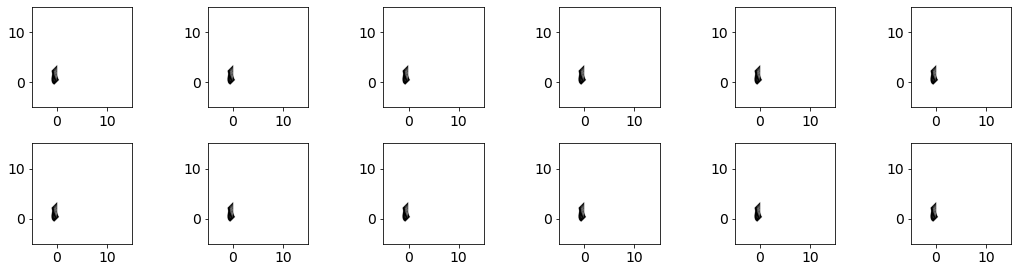

[ 1.          1.         16.67881614  1.        ]
[61.43158956  1.         11.88317841  1.        ]
[61.43158956  1.         11.88317841  1.        ]
[ 804.29632017 3157.22082383  804.29632017 3157.22082383  804.29632017
 3157.22082383]
[1. 1. 1. 1. 1. 1.]
[0.07132208162841741, 0.053663349989484535, [0.05081606499696192, 0.3583443850341909, 0.36275750960396147, 0.37650494947381746]]


<ipython-input-29-f4a171231178>:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


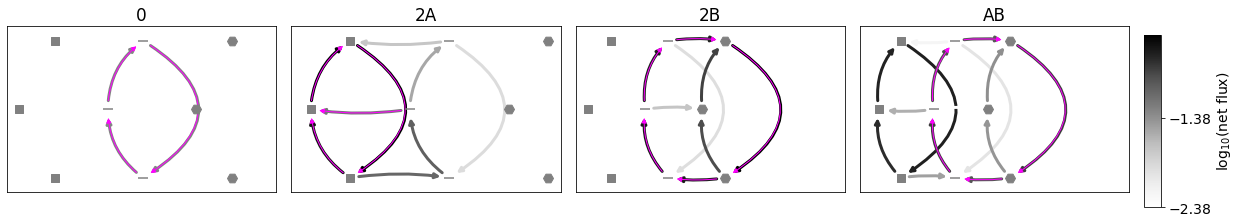

[  1.12239503 153.27404752   1.26348478   1.        ]
[146.32503189 153.27404752   1.26348478   1.        ]
[146.32503189 153.27404752   1.26348478   1.        ]
[1. 1. 1. 1. 1. 1.]
[ 24.92365609 376.5609188   24.92365609 376.5609188   24.92365609
 376.5609188 ]
[0.03851992849066518, 0.06758374500032747, [0.3307774859916056, 0.8576136686578838, 0.8405094751258898, 0.8808203668654004]]


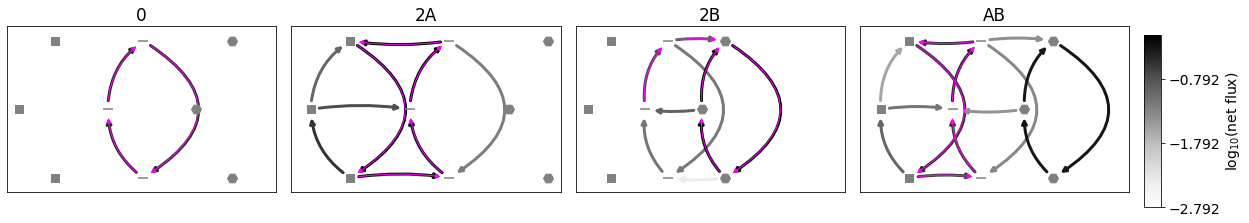

[ 2.35025551  1.82889689 73.92406305  8.61902817]
[2.35025551e+00 2.06236298e+00 1.00000000e+00 8.61902817e+03]
[2.35025551e+00 2.06236298e+00 1.00000000e+00 8.61902817e+03]
[3.02329914 4.41900614 3.02329914 4.41900614 3.02329914 4.41900614]
[  138.12526479 10000.           138.12526479 10000.
   138.12526479 10000.        ]
[0.08553890718106118, 0.08005565210839181, [0.2110768970318773, 0.8307200736882622, 0.8338834014196161, 0.8814638009254552]]


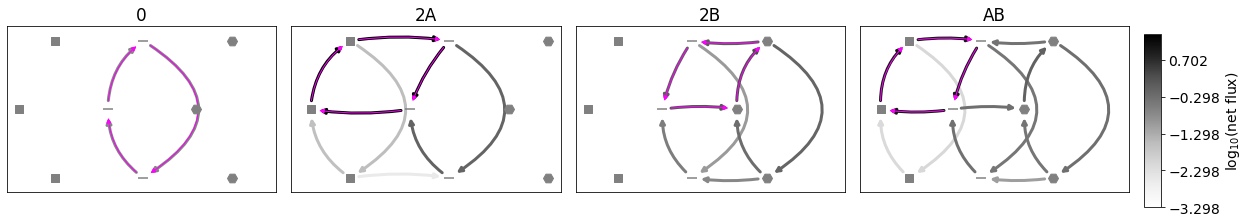

[2.22016300e+02 5.78884607e+01 7.51368116e+00 1.00000000e+04]
[2.22016300e+02 1.00000000e+04 7.51368116e+00 1.00000000e+04]
[2.22016300e+02 1.00000000e+04 7.51368116e+00 1.00000000e+04]
[33.05826048 11.25462315 33.05826048 11.25462315 33.05826048 11.25462315]
[ 2836.23381396 10000.          2836.23381396 10000.
  2836.23381396 10000.        ]
[0.03413104464744795, 0.09140285175018094, [45.6993317561563, 200.46761063662035, 192.66537948703734, 205.2667859845833]]


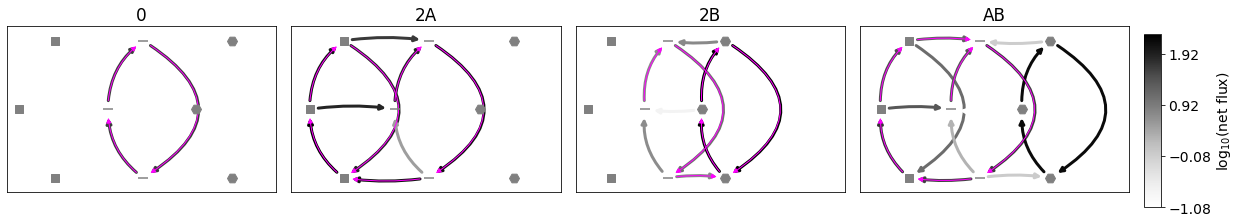

[9.24197699e+00 3.53692394e+00 1.00000000e+00 1.00000000e+04]
[9.24197699e+00 1.81226309e+02 1.00000000e+00 1.00000000e+04]
[9.24197699e+00 1.81226309e+02 1.00000000e+00 1.00000000e+04]
[ 28.52857848 239.34858738  28.52857848 239.34858738  28.52857848
 239.34858738]
[1. 1. 1. 1. 1. 1.]
[0.059184470984046875, 0.07939334256545569, [2.557254817526094, 6.96993581944149, 6.872983519370272, 7.261813316850074]]


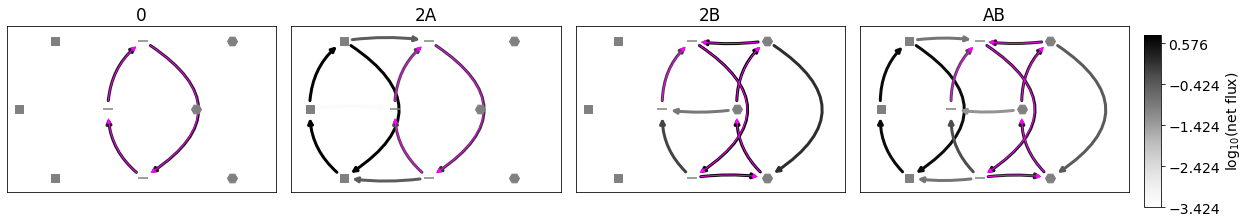

[ 1.          1.         19.86917808  1.        ]
[1000.            1.35391152   19.86917808    1.        ]
[1000.            1.35391152   19.86917808    1.        ]
[  249.4564698 10000.          249.4564698 10000.          249.4564698
 10000.       ]
[1.31879012 1.8853834  1.31879012 1.8853834  1.31879012 1.8853834 ]
[0.12195596230668498, 0.11123484548117357, [0.04372697595059328, 0.40480586210156616, 0.40782530604108597, 0.4405134730719725]]


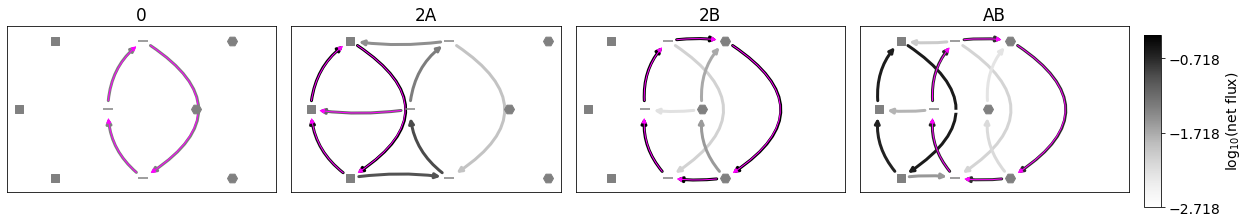

[1. 1. 1. 1.]
[   1.56800619    1.            1.         1000.        ]
[   1.56800619    1.            1.         1000.        ]
[ 22.86099726 275.15279183  22.86099726 275.15279183  22.86099726
 275.15279183]
[1. 1. 1. 1. 1. 1.]
[0.029194635031095123, 0.11549412548958056, [0.25, 0.5387054821193004, 0.507425934153992, 0.5497178712020259]]


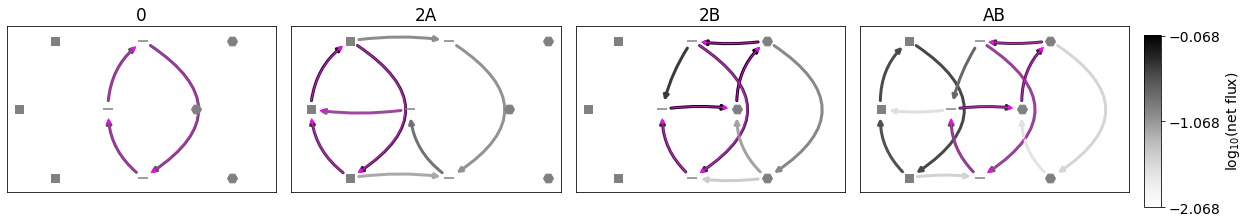

[83.35221526 30.94446329 10.91669255 66.71875867]
[3.43199061e+03 5.03988400e+03 4.83695357e+00 6.67187587e+01]
[3.43199061e+03 5.03988400e+03 4.83695357e+00 6.67187587e+01]
[ 1311.18352769 10000.          1311.18352769 10000.
  1311.18352769 10000.        ]
[6.55222602 2.25524879 6.55222602 2.25524879 6.55222602 2.25524879]
[0.06315202566693846, 0.10361392674406729, [16.322651950796473, 58.13227402328681, 56.52454383087559, 60.733451942260025]]


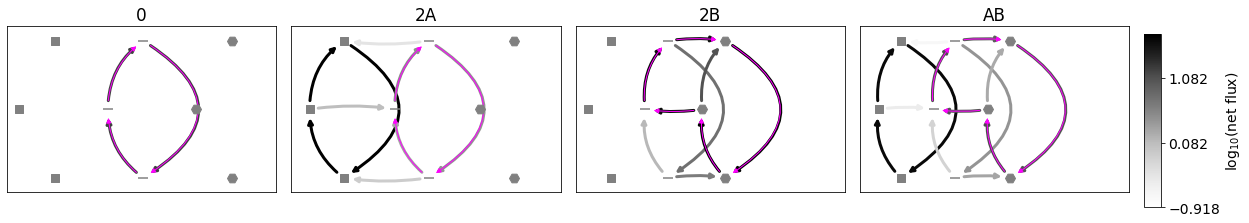

[ 2.47282671 24.18864067 16.81829125  1.34369702]
[1000.           27.59195742   16.81829125    1.34369702]
[1000.           27.59195742   16.81829125    1.34369702]
[2.06676554 1.         2.06676554 1.         2.06676554 1.        ]
[ 223.25690982 2712.76395889  223.25690982 2712.76395889  223.25690982
 2712.76395889]
[0.07954763887469227, 0.11313744815098771, [0.15996055776841545, 1.1064751508549853, 1.081011029040346, 1.1691975332001139]]


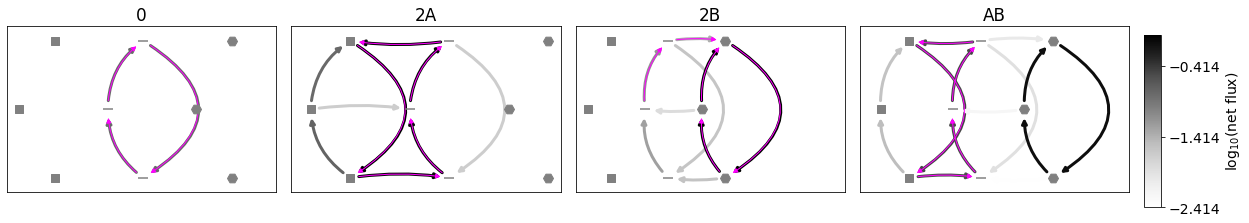

[14.60042961 11.75148188  1.         30.37559762]
[1.00000000e+04 3.65755769e+01 1.00000000e+00 3.03755976e+01]
[1.00000000e+04 3.65755769e+01 1.00000000e+00 3.03755976e+01]
[ 2.53833772 10.0446546   2.53833772 10.0446546   2.53833772 10.0446546 ]
[  495.4490921 10000.          495.4490921 10000.          495.4490921
 10000.       ]
[0.14136448099391377, 0.12748504958176263, [5.29765519169286, 9.405712080028856, 9.496636293697595, 10.374009215349528]]


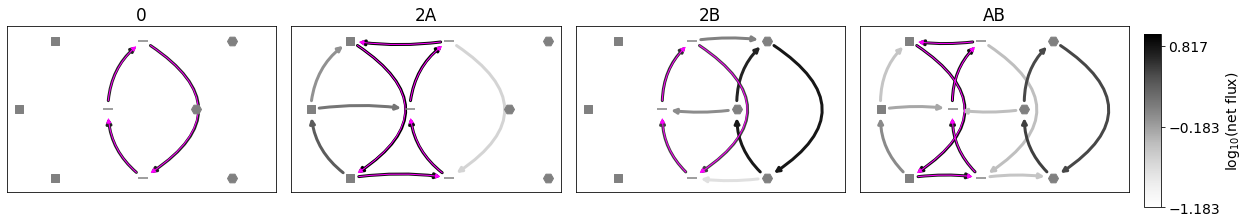

[6.92909974 1.         1.         1.        ]
[   9.24197699    1.41248128    1.         1000.        ]
[   9.24197699    1.41248128    1.         1000.        ]
[ 47.77256328 239.34858738  47.77256328 239.34858738  47.77256328
 239.34858738]
[1. 1. 1. 1. 1. 1.]
[0.02881528833579878, 0.1285836550660773, [0.4369411387694268, 1.0330736715943392, 0.9640465892744402, 1.0539149366098781]]


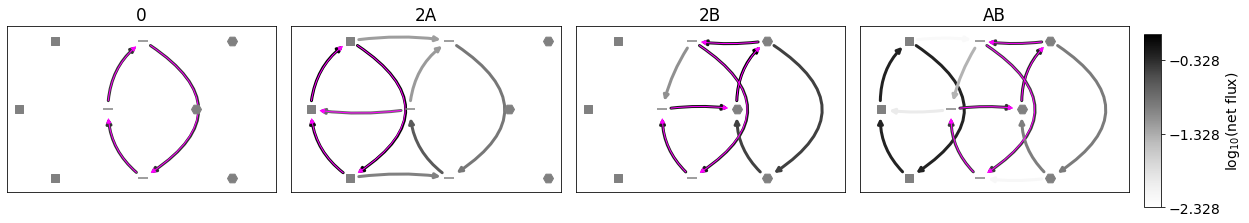

[  5.96038337 123.37872316  16.61374068   4.65030731]
[5.96038337e+03 1.00000000e+04 1.00000000e+00 1.01469516e+01]
[5.96038337e+03 1.00000000e+04 1.00000000e+00 1.01469516e+01]
[1. 1. 1. 1. 1. 1.]
[263.39434623 437.52722864 263.39434623 437.52722864 263.39434623
 437.52722864]
[0.06215407771184597, 0.13362570685355052, [1.009782777438976, 7.5268839438832345, 7.163085178818264, 7.858243129351863]]


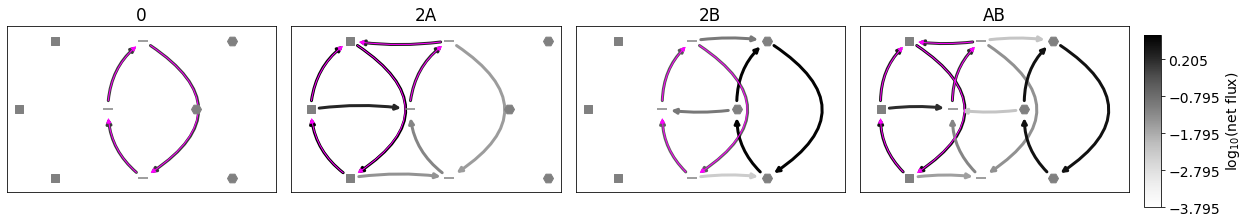

[ 36.11384091   1.         140.32548452  30.44966827]
[  36.11384091 1000.            1.           30.44966827]
[  36.11384091 1000.            1.           30.44966827]
[ 37.98497292 104.58196713  37.98497292 104.58196713  37.98497292
 104.58196713]
[1.         2.44726938 1.         2.44726938 1.         2.44726938]
[0.0865733806012251, 0.12823893831569969, [0.8416516568137045, 8.042813461826656, 7.813856181156551, 8.540222400861925]]


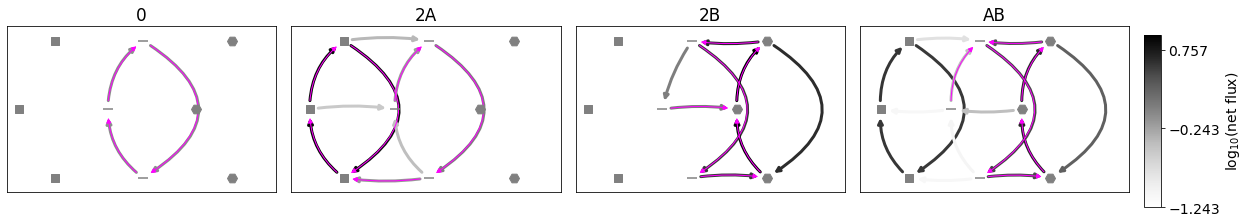

[  4.38121498 170.66930943   1.          32.19196928]
[4.38121498e+03 2.92015277e+03 1.00000000e+00 3.21919693e+01]
[4.38121498e+03 2.92015277e+03 1.00000000e+00 3.21919693e+01]
[  51.13401    1323.23941674   51.13401    1323.23941674   51.13401
 1323.23941674]
[1. 1. 1. 1. 1. 1.]
[0.11768992141199082, 0.1380364217669442, [3.672955479462584, 22.750707385079732, 22.432103379360505, 24.68442988822766]]


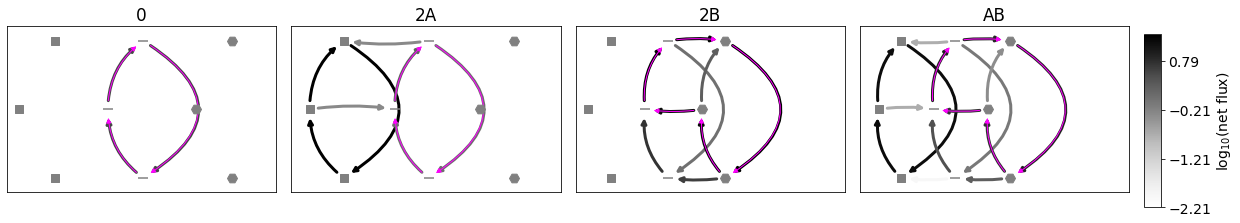

[ 267.18961842   24.24656372 2023.16245148  227.48986856]
[2.67189618e+02 3.24804637e+03 2.02316245e+00 2.27489869e+02]
[2.67189618e+02 3.24804637e+03 2.02316245e+00 2.27489869e+02]
[ 1.        15.2127151  1.        15.2127151  1.        15.2127151]
[  585.03451734 10000.           585.03451734 10000.
   585.03451734 10000.        ]
[0.16693134315073807, 0.17081081879364823, [12.096804329529595, 24.50921004471051, 24.44339214555811, 27.51570567092674]]


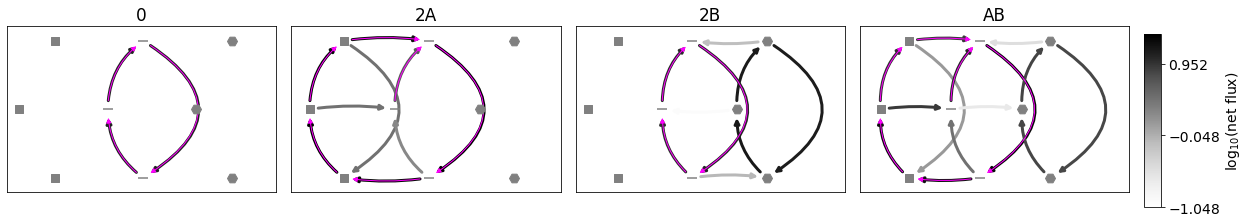

[   4.08599668    2.33357393  600.20631568 2175.92074029]
[7.34213255e+02 3.39228709e+00 1.16911755e+00 2.17592074e+03]
[7.34213255e+02 3.39228709e+00 1.16911755e+00 2.17592074e+03]
[116.29223995 975.33621105 116.29223995 975.33621105 116.29223995
 975.33621105]
[1.         1.19700761 1.         1.19700761 1.         1.19700761]
[0.03505008965562242, 0.16922342560250128, [1.3491019881968005, 2.70937632884711, 2.4687614853036, 2.776006383774281]]


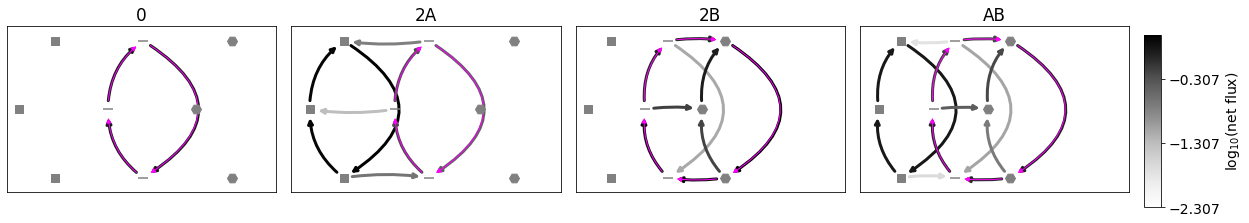

[1.00000000e+00 1.00000000e+00 1.00000000e+04 6.13600434e+03]
[1.00000000e+03 1.42257764e+00 1.98509745e+02 6.13600434e+03]
[1.00000000e+03 1.42257764e+00 1.98509745e+02 6.13600434e+03]
[1.         2.72239591 1.         2.72239591 1.         2.72239591]
[ 53.0267563  439.74753379  53.0267563  439.74753379  53.0267563
 439.74753379]
[0.06595454344511607, 0.151809425870486, [0.2754905916118671, 1.0676423202470469, 1.005960401541704, 1.1175837448298194]]


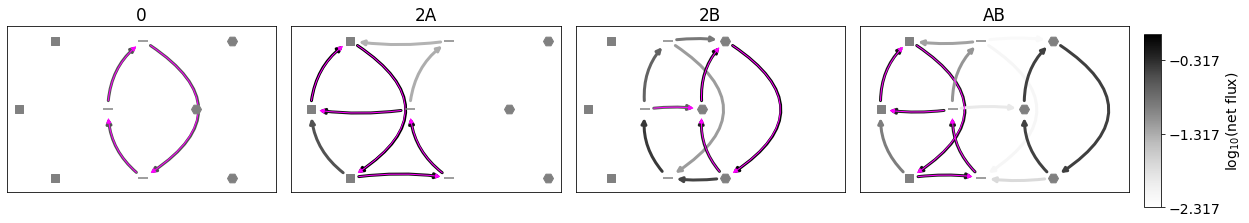

[1.00000000e+00 1.00000000e+00 8.15834863e+03 2.74596779e+03]
[1.00000000e+03 1.42995197e+00 5.92560197e+01 1.00000000e+04]
[1.00000000e+03 1.42995197e+00 5.92560197e+01 1.00000000e+04]
[1.        2.8226062 1.        2.8226062 1.        2.8226062]
[ 68.78981768 902.88986476  68.78981768 902.88986476  68.78981768
 902.88986476]
[0.08863332816954819, 0.15269999929382516, [0.20115087700912035, 1.041144219504256, 0.9959210286637759, 1.10711359202488]]


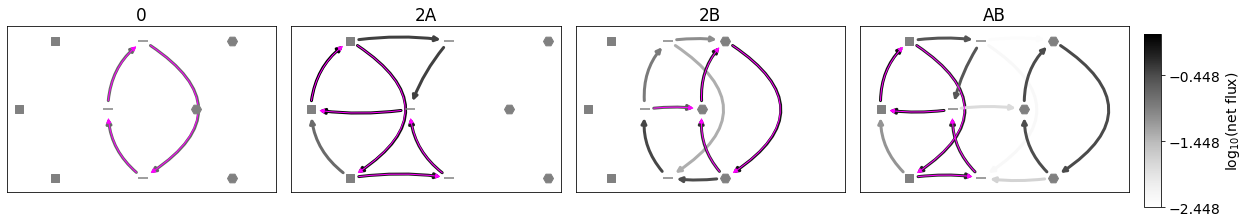

[2.68543711e+00 2.33357393e+00 1.00000000e+04 2.17592074e+03]
[1923.92829345    3.39228709   10.         2175.92074029]
[1923.92829345    3.39228709   10.         2175.92074029]
[1.         1.36377314 1.         1.36377314 1.         1.36377314]
[ 446.56098526 2429.71659616  446.56098526 2429.71659616  446.56098526
 2429.71659616]
[0.11652901551452938, 0.16633644547490387, [0.3979738514894843, 2.5825824119850225, 2.494943175422049, 2.7998380935228653]]


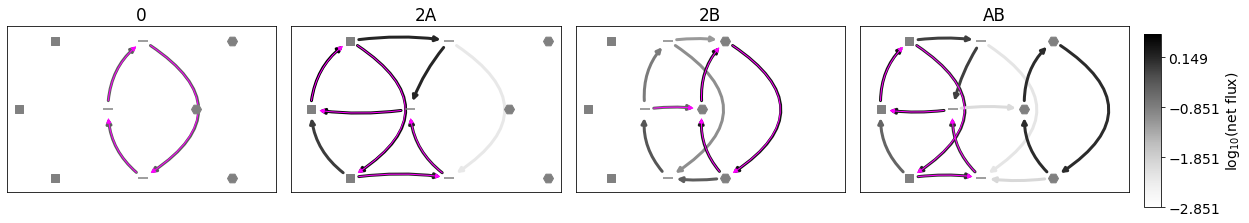

[2.03940309e+02 4.10241994e+00 1.00000000e+04 1.93006341e+02]
[ 887.08609848 4102.41993944   31.62105831  193.00634124]
[ 887.08609848 4102.41993944   31.62105831  193.00634124]
[  79.23737908 6644.91457132   79.23737908 6644.91457132   79.23737908
 6644.91457132]
[  1.         122.96230163   1.         122.96230163   1.
 122.96230163]
[0.12984838458157758, 0.1554834231995698, [1.9689041702717007, 4.409735161073263, 4.332071260238922, 4.825038312384603]]


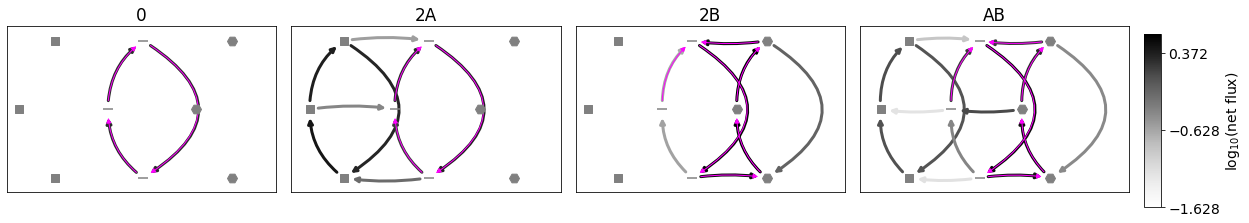

[ 1.          1.         57.55043221 21.06046601]
[2.93712976e+00 2.17901422e+01 1.00000000e+00 8.61902817e+03]
[2.93712976e+00 2.17901422e+01 1.00000000e+00 8.61902817e+03]
[ 5.33622799 57.13148769  5.33622799 57.13148769  5.33622799 57.13148769]
[  275.2447662 10000.          275.2447662 10000.          275.2447662
 10000.       ]
[0.18865889570075023, 0.18174527473145088, [0.20920016504600794, 0.6386121199464723, 0.6416797939290078, 0.727828643494957]]


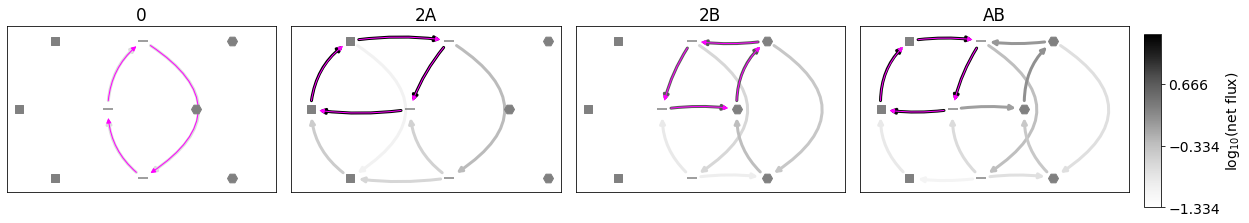

[45.17854619  4.37908747  1.          1.        ]
[ 45.17854619   6.35055191   1.         260.62362366]
[ 45.17854619   6.35055191   1.         260.62362366]
[1. 1. 1. 1. 1. 1.]
[ 495.72582167 1056.47244636  495.72582167 1056.47244636  495.72582167
 1056.47244636]
[0.047384078140446935, 0.18813703934651452, [0.7857762691052954, 4.584192695049953, 4.158071964457749, 4.737256426414596]]


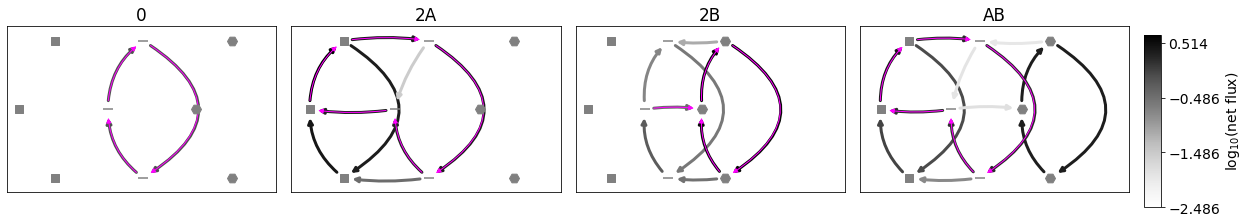

[  6.50266689   3.9062167   32.39636221 101.41024337]
[6.50266689e+03 2.07195407e+01 1.00000000e+00 1.01410243e+02]
[6.50266689e+03 2.07195407e+01 1.00000000e+00 1.01410243e+02]
[ 1.         17.62395324  1.         17.62395324  1.         17.62395324]
[  40.34720327 1527.64982682   40.34720327 1527.64982682   40.34720327
 1527.64982682]
[0.05777231013905474, 0.1912677107853674, [2.1332264810401016, 4.233845388753438, 3.8596584491252117, 4.406828938926664]]


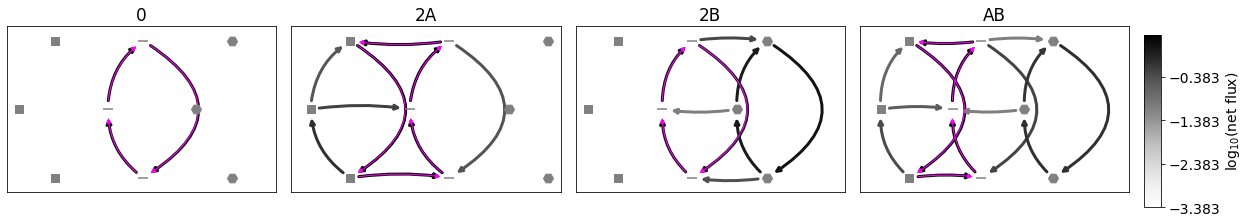

[26.85520072  1.         99.78499694 30.44966827]
[ 33.36611033 503.88719636  99.78499694  30.44966827]
[ 33.36611033 503.88719636  99.78499694  30.44966827]
[  45.96862256 1292.93235122   45.96862256 1292.93235122   45.96862256
 1292.93235122]
[1. 1. 1. 1. 1. 1.]
[0.08094153483251354, 0.18147192574317111, [0.8388527391934212, 4.7029450710086715, 4.386390004293161, 4.974343091534608]]


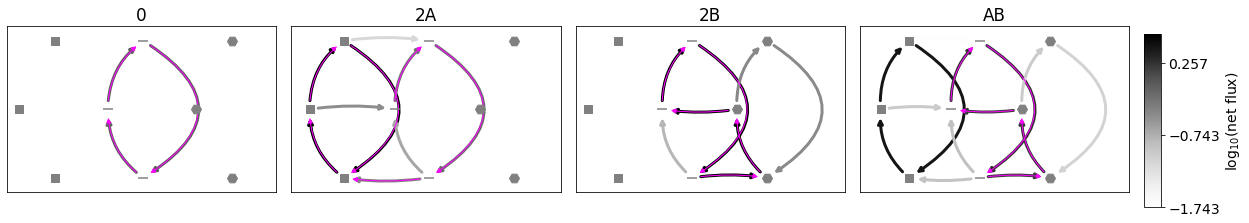

[ 4.63855071 16.64206358 23.45001124 26.15641193]
[3.86527329e+03 1.66420636e+01 1.00000000e+00 2.88376457e+02]
[3.86527329e+03 1.66420636e+01 1.00000000e+00 2.88376457e+02]
[1. 1. 1. 1. 1. 1.]
[ 201.23072579 2974.07225647  201.23072579 2974.07225647  201.23072579
 2974.07225647]
[0.11038725788268232, 0.18731376384402723, [1.9716753332779324, 12.138390912243398, 11.508108131328383, 13.10361110539946]]


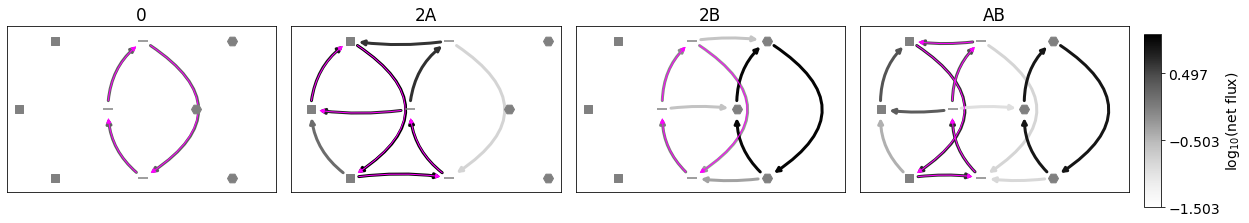

[2.03940309e+02 4.10241994e+00 7.72464808e+03 1.93006341e+02]
[ 214.89400657 4102.41993944   13.18277776  744.64701166]
[ 214.89400657 4102.41993944   13.18277776  744.64701166]
[  1.         122.96230163   1.         122.96230163   1.
 122.96230163]
[  66.13268172 6644.91457132   66.13268172 6644.91457132   66.13268172
 6644.91457132]
[0.13272146892012823, 0.19297281642032652, [2.2217748991371296, 5.077307876854479, 4.869630804097598, 5.566556764192746]]


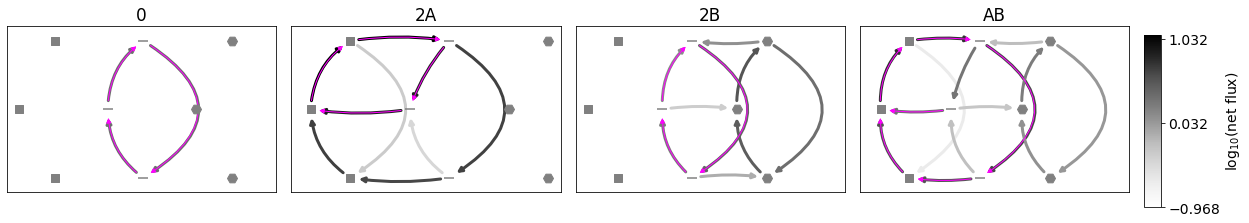

[1.37194336e+01 1.00000000e+00 1.00000000e+04 6.60052350e+03]
[  13.71943358 1000.           10.         6600.52349879]
[  13.71943358 1000.           10.         6600.52349879]
[1.         7.17449045 1.         7.17449045 1.         7.17449045]
[  85.67982682 6815.4415078    85.67982682 6815.4415078    85.67982682
 6815.4415078 ]
[0.16348328372072518, 0.18386253087959215, [0.8449725529102097, 4.482191480313547, 4.41932194770483, 5.020000702856788]]


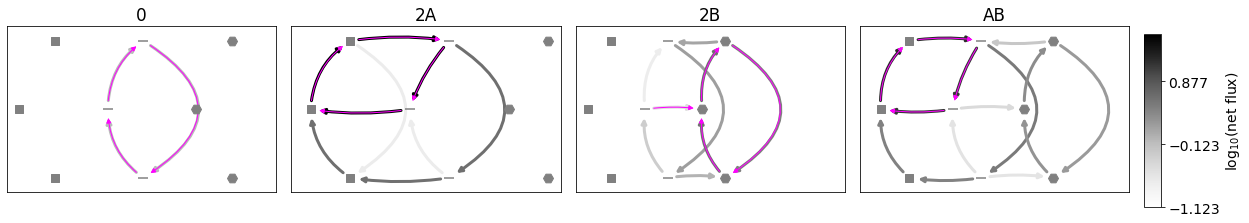

[ 1.          1.82889689 73.92406305  8.61902817]
[1.00000000e+00 2.17901422e+01 1.00000000e+00 8.61902817e+03]
[1.00000000e+00 2.17901422e+01 1.00000000e+00 8.61902817e+03]
[3.02329914 4.41900614 3.02329914 4.41900614 3.02329914 4.41900614]
[  279.60896474 10000.           279.60896474 10000.
   279.60896474 10000.        ]
[0.21208801560547222, 0.21565567621911108, [0.0976596414643067, 0.6181416555422569, 0.6166149329576331, 0.7160327150496696]]


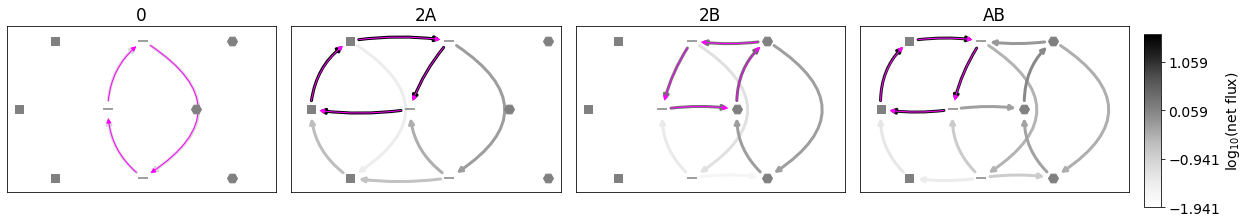

[1.92392829e+00 2.33357393e+00 1.00000000e+04 2.17592074e+03]
[1.92392829e+03 3.39228709e+00 1.00000000e+01 8.64329376e+03]
[1.92392829e+03 3.39228709e+00 1.00000000e+01 8.64329376e+03]
[1.         1.36377314 1.         1.36377314 1.         1.36377314]
[446.56098526 975.33621105 446.56098526 975.33621105 446.56098526
 975.33621105]
[0.03331301637347022, 0.2185543723350224, [0.29962617609232783, 2.825241702745943, 2.484805522256685, 2.891237880611821]]


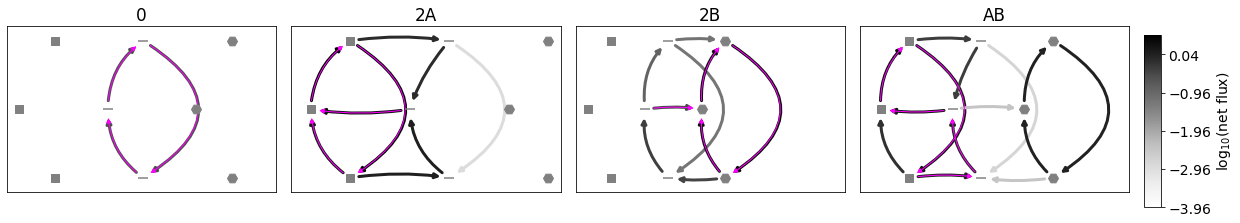

[1.92392829e+00 2.33357393e+00 1.00000000e+04 1.00000000e+04]
[1.92392829e+03 3.39228709e+00 9.49840418e+03 1.00000000e+04]
[1.92392829e+03 3.39228709e+00 9.49840418e+03 1.00000000e+04]
[ 47.15490224 496.18921874  47.15490224 496.18921874  47.15490224
 496.18921874]
[1. 1. 1. 1. 1. 1.]
[0.0595829926725167, 0.21188913468225792, [0.6811214143659594, 2.6857919310265985, 2.4167050381686286, 2.7990369573954714]]


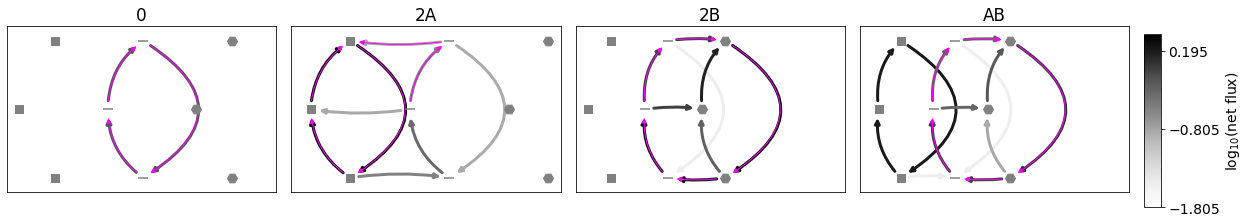

[  4.38121498 170.66930943   1.          32.19196928]
[4.38121498e+03 2.92015277e+03 1.00000000e+00 3.21919693e+01]
[4.38121498e+03 2.92015277e+03 1.00000000e+00 3.21919693e+01]
[  51.13401    2460.84345571   51.13401    2460.84345571   51.13401
 2460.84345571]
[1. 1. 1. 1. 1. 1.]
[0.07554457433049892, 0.20185234110318595, [3.672955479462584, 22.750707385079732, 20.843587903497358, 23.97375636982842]]


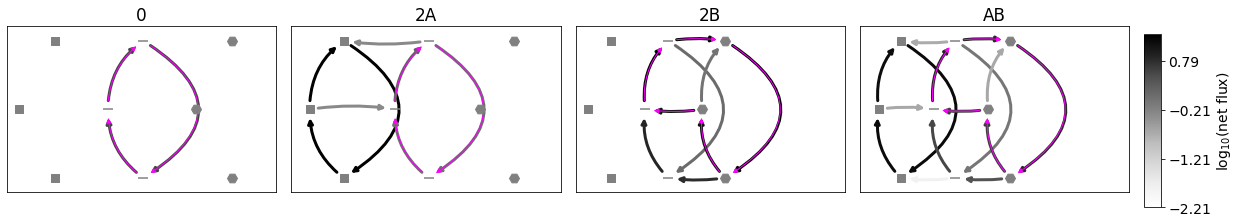

[2.03940309e+02 4.10241994e+00 1.00000000e+04 1.93006341e+02]
[ 214.89400657 4102.41993944   10.          193.00634124]
[ 214.89400657 4102.41993944   10.          193.00634124]
[  1.         122.96230163   1.         122.96230163   1.
 122.96230163]
[  66.13268172 6644.91457132   66.13268172 6644.91457132   66.13268172
 6644.91457132]
[0.11974594645760088, 0.20704156469644897, [1.9689041702717007, 3.7030609843360054, 3.4856378650351467, 4.023536876601433]]


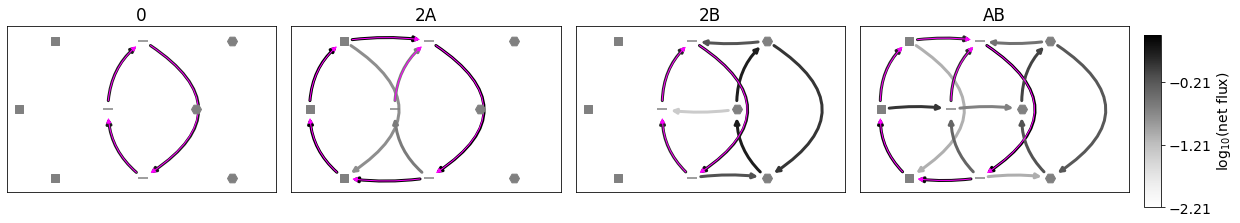

[  3.72778105 172.49636682   3.88803923   1.        ]
[   5.33097744  717.83641186    1.39280637 1000.        ]
[   5.33097744  717.83641186    1.39280637 1000.        ]
[ 183.89377054 9614.51125915  183.89377054 9614.51125915  183.89377054
 9614.51125915]
[1.01716772 1.86535703 1.01716772 1.86535703 1.01716772 1.86535703]
[0.13455062794497832, 0.2177190885716666, [0.4315844637012159, 3.240413752538742, 3.0588928570006866, 3.557166892977923]]


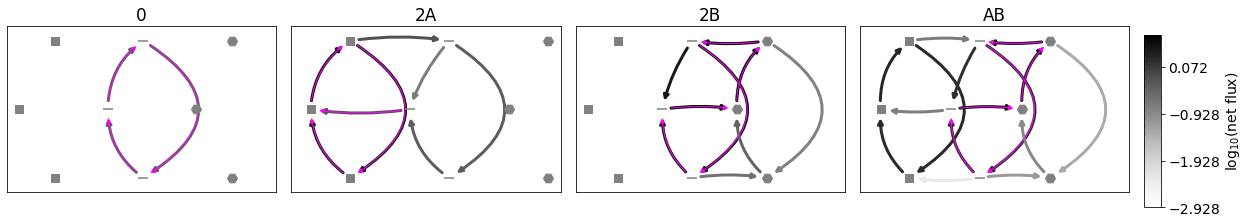

[2.03940309e+02 1.00000000e+00 1.00000000e+04 1.93006341e+02]
[ 494.7080408  1000.           10.          744.64701166]
[ 494.7080408  1000.           10.          744.64701166]
[  1.         122.96230163   1.         122.96230163   1.
 122.96230163]
[  180.34787682 10000.           180.34787682 10000.
   180.34787682 10000.        ]
[0.16526392160713402, 0.21476392286967197, [0.7910527694387228, 4.771974332448159, 4.611021145637658, 5.351154578814073]]


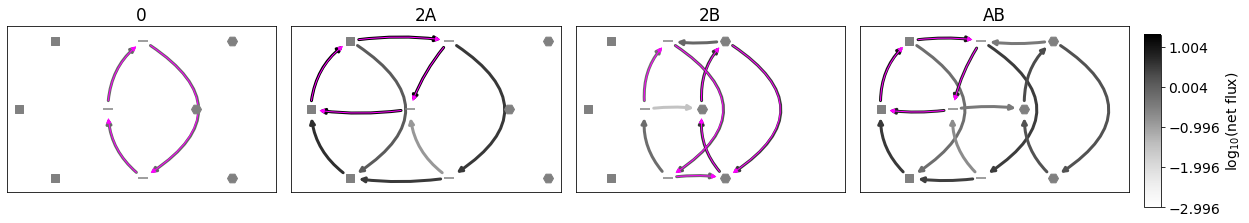

[4.38121498e+00 4.22481263e+03 1.16457553e+01 1.00000000e+00]
[4.38121498e+03 4.22481263e+03 1.16457553e+01 1.91270053e+00]
[4.38121498e+03 4.22481263e+03 1.16457553e+01 1.91270053e+00]
[  72.67224855 1761.5016928    72.67224855 1761.5016928    72.67224855
 1761.5016928 ]
[1.         2.89122311 1.         2.89122311 1.         2.89122311]
[0.19394819348723438, 0.21136957977660287, [0.2572946378841233, 0.9769761490099331, 0.9652495360386909, 1.1175531453958627]]


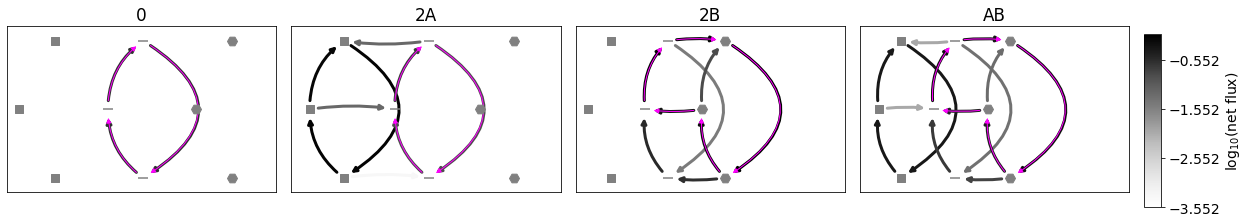

[  3.22830966   1.         129.39229472  37.86157048]
[3.71370210e+00 2.17901422e+01 1.29392295e+02 1.00000000e+04]
[3.71370210e+00 2.17901422e+01 1.29392295e+02 1.00000000e+04]
[ 8.82253569 34.58474329  8.82253569 34.58474329  8.82253569 34.58474329]
[  641.35492485 10000.           641.35492485 10000.
   641.35492485 10000.        ]
[0.22550855300034992, 0.23336888376502202, [0.4175751968366089, 1.51317236809316, 1.5049504693435265, 1.76918496845268]]


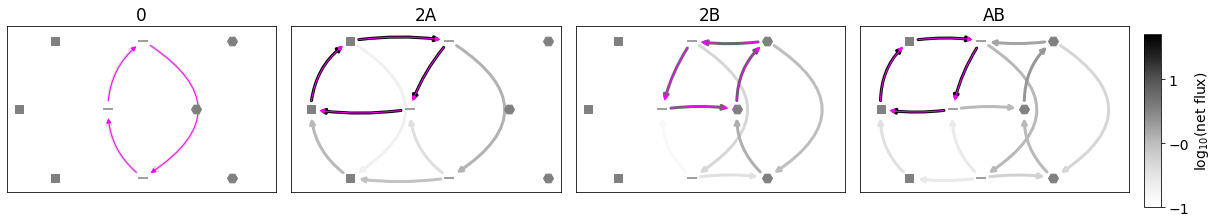

[ 1.         12.98163403  1.70951602  9.4626065 ]
[1000.           16.64206358    1.            9.4626065 ]
[1000.           16.64206358    1.            9.4626065 ]
[  173.26543902 10000.           173.26543902 10000.
   173.26543902 10000.        ]
[2.01469513 1.         2.01469513 1.         2.01469513 1.        ]
[0.028181700853198995, 0.22711738595625253, [0.7334759633867306, 5.235385018714869, 4.561030931342767, 5.338658772041877]]


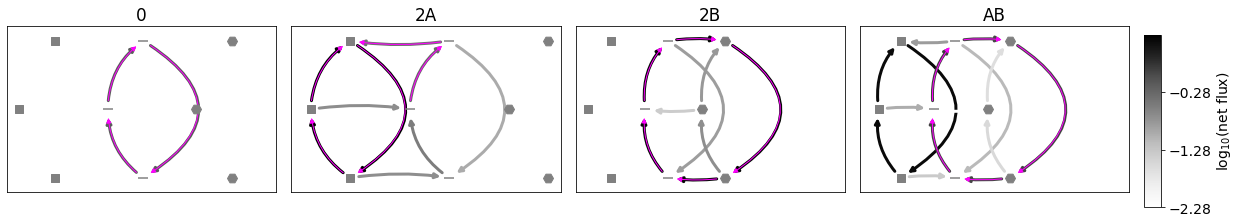

[3.19103451e+01 2.00722810e+02 2.05999865e+00 7.12497847e+03]
[9.33633893e+03 2.88160545e+02 1.00000000e+00 1.00000000e+04]
[9.33633893e+03 2.88160545e+02 1.00000000e+00 1.00000000e+04]
[1. 1. 1. 1. 1. 1.]
[1508.47917706 3995.16480534 1508.47917706 3995.16480534 1508.47917706
 3995.16480534]
[0.06688009178986695, 0.22615298546789825, [27.420393938409084, 213.1498372556608, 190.87062117909156, 223.26359790046882]]


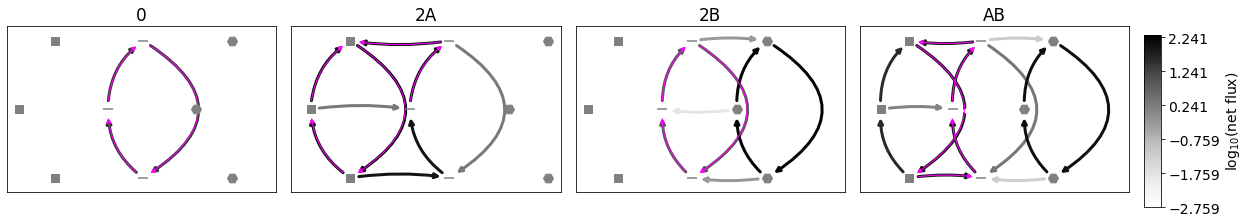

[ 27.1792196  393.45631166   7.54638487 308.84169906]
[1.00000000e+04 4.88701805e+03 7.54638487e+00 3.08841699e+02]
[1.00000000e+04 4.88701805e+03 7.54638487e+00 3.08841699e+02]
[  685.97095208 10000.           685.97095208 10000.
   685.97095208 10000.        ]
[1. 1. 1. 1. 1. 1.]
[0.08380222280637963, 0.22587449071791144, [23.003676986658466, 196.18271206037443, 177.78401905306058, 207.91590682678137]]


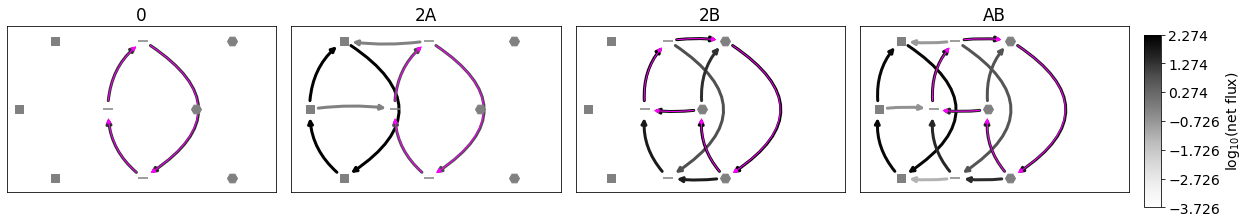

[ 53.4966475    1.         262.77922686  18.91721565]
[ 84.08139632 503.88719636 262.77922686  30.44966827]
[ 84.08139632 503.88719636 262.77922686  30.44966827]
[1.         5.22274244 1.         5.22274244 1.         5.22274244]
[  83.41005642 1292.93235122   83.41005642 1292.93235122   83.41005642
 1292.93235122]
[0.11599721362611949, 0.24082620339954394, [0.7511929082716763, 3.172061984076461, 2.909138479732764, 3.437639301234633]]


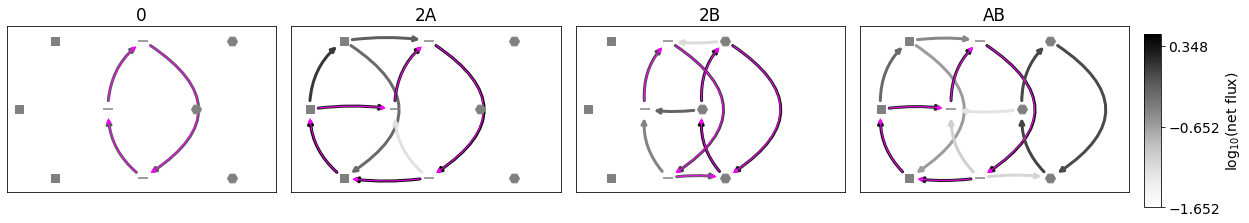

[26.85520072  2.27239148 23.17232773 23.4710688 ]
[  34.38910785 1656.92288512   23.17232773   49.12983061]
[  34.38910785 1656.92288512   23.17232773   49.12983061]
[  59.52425127 1292.93235122   59.52425127 1292.93235122   59.52425127
 1292.93235122]
[1.         2.24098762 1.         2.24098762 1.         2.24098762]
[0.14493884635492743, 0.2489849039290603, [1.796395841837555, 8.819074232321164, 8.205442640427933, 9.751107369236834]]


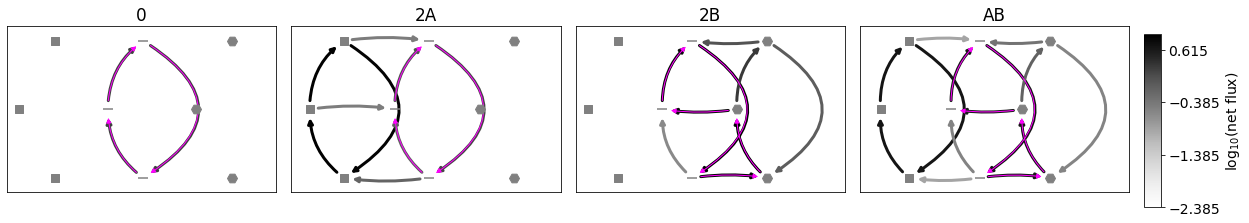

[8.51802323e+00 1.00000000e+00 2.16494237e+03 5.95341051e+03]
[1.14669404e+01 8.73278674e+02 2.16494237e+00 5.95341051e+03]
[1.14669404e+01 8.73278674e+02 2.16494237e+00 5.95341051e+03]
[  73.99435331 1834.01672061   73.99435331 1834.01672061   73.99435331
 1834.01672061]
[1.         2.54791089 1.         2.54791089 1.         2.54791089]
[0.16796480189300267, 0.23206372419561, [0.8618775483851582, 6.0790209952854894, 5.814842353178144, 6.829612871432188]]


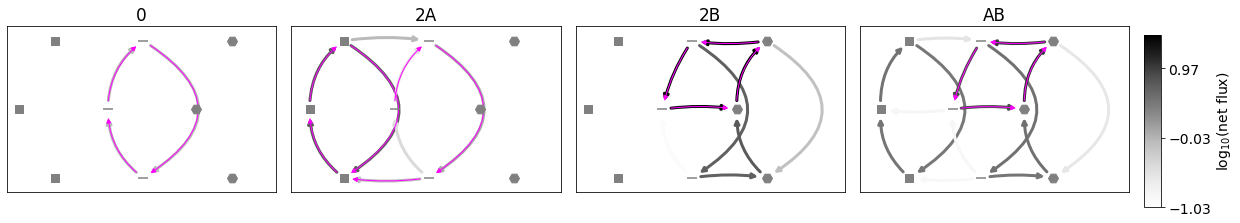

[6.71201583e+00 1.00000000e+04 2.16179807e+00 3.21919693e+01]
[6.71201583e+03 1.00000000e+04 2.00070642e+00 7.72894199e+01]
[6.71201583e+03 1.00000000e+04 2.00070642e+00 7.72894199e+01]
[ 1342.49585021 10000.          1342.49585021 10000.
  1342.49585021 10000.        ]
[1.73598258 3.50683508 1.73598258 3.50683508 1.73598258 3.50683508]
[0.1951023542028316, 0.24473796300426073, [5.258864210767178, 41.37228946816619, 39.97309240620632, 47.363219470230135]]


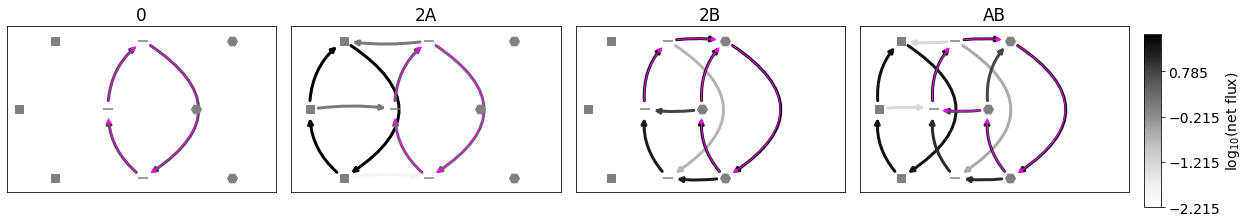

[1577.23767799    2.19878856  537.23300762   25.56541841]
[1577.23767799 1633.26496816  233.77107033   35.95076503]
[1577.23767799 1633.26496816  233.77107033   35.95076503]
[1.         2.12074492 1.         2.12074492 1.         2.12074492]
[ 211.08901573 4747.87079644  211.08901573 4747.87079644  211.08901573
 4747.87079644]
[0.2113414285495965, 0.2371178310530673, [1.969013347591674, 16.643640102993775, 16.348911610112868, 19.269410357953944]]


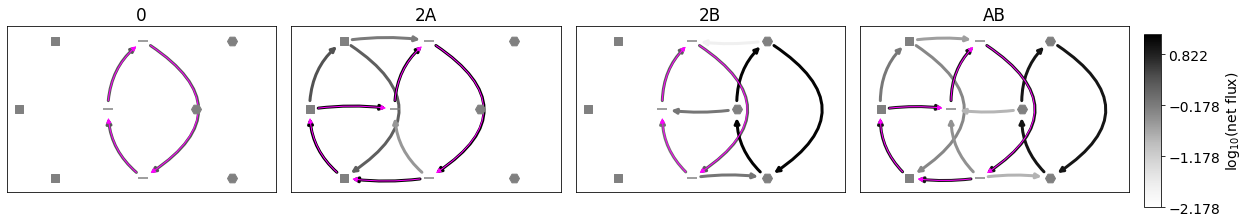

[ 1.          1.         80.05263473  8.45105595]
[1.60788352e+00 2.17901422e+01 7.52185377e+00 8.45105595e+03]
[1.60788352e+00 2.17901422e+01 7.52185377e+00 8.45105595e+03]
[ 4.35981505 19.11601592  4.35981505 19.11601592  4.35981505 19.11601592]
[ 248.33337317 8758.72552275  248.33337317 8758.72552275  248.33337317
 8758.72552275]
[0.26310819198069785, 0.2668132435746132, [0.08627510394048528, 0.575957235116606, 0.5744799905108463, 0.6911840316080317]]


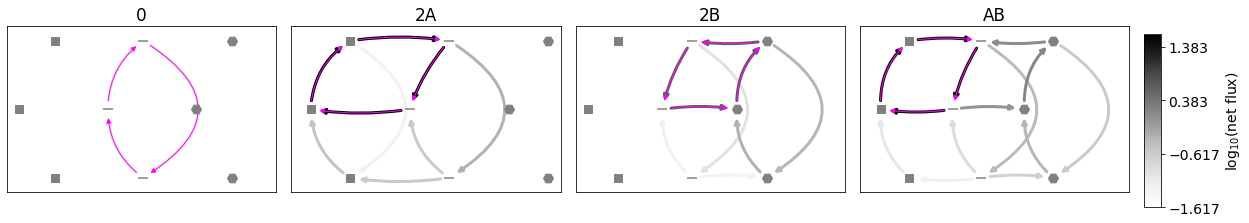

[ 5.14717515 27.65667529  2.96130995 19.65472809]
[1.04374704e+03 4.66631955e+01 1.00000000e+00 1.96547281e+01]
[1.04374704e+03 4.66631955e+01 1.00000000e+00 1.96547281e+01]
[1. 1. 1. 1. 1. 1.]
[1354.11773661 5200.18974488 1354.11773661 5200.18974488 1354.11773661
 5200.18974488]
[0.04465027520267546, 0.2503239997867558, [3.2196890636736173, 11.979512405195019, 10.387838312171432, 12.356065838326389]]


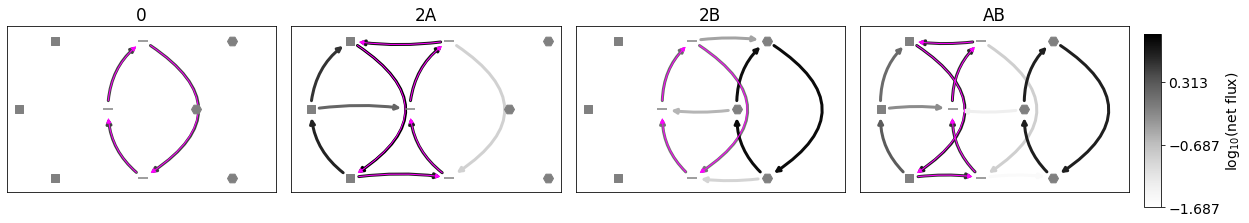

[   50.10044586   193.24097985    48.08920844 10000.        ]
[1.00000000e+04 2.32758162e+02 1.00000000e+00 1.00000000e+04]
[1.00000000e+04 2.32758162e+02 1.00000000e+00 1.00000000e+04]
[1.         1.88891494 1.         1.88891494 1.         1.88891494]
[  685.97095208 10000.           685.97095208 10000.
   685.97095208 10000.        ]
[0.058325068233667086, 0.25667979340059877, [39.47767313968681, 153.87725435210203, 134.110785580585, 160.22564316860735]]


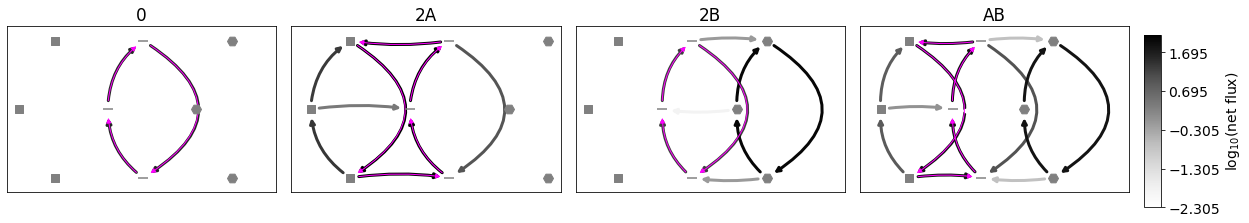

[  1.74643093   2.03220283 702.66046887 341.74135342]
[1.00000000e+03 3.39228709e+00 4.17276494e+00 3.73472565e+03]
[1.00000000e+03 3.39228709e+00 4.17276494e+00 3.73472565e+03]
[1.         4.38610823 1.         4.38610823 1.         4.38610823]
[  60.09399691 1262.33985515   60.09399691 1262.33985515   60.09399691
 1262.33985515]
[0.08949969148900996, 0.2543105086043002, [0.44544918363531005, 2.0523860569099264, 1.830821719828441, 2.183741096561787]]


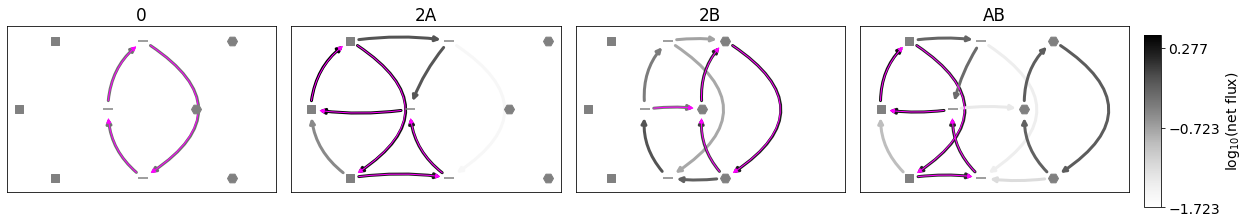

[331.54923918  23.04463932  17.93681224 756.90329834]
[  551.98817635 10000.            10.22441595   756.90329834]
[  551.98817635 10000.            10.22441595   756.90329834]
[6.55222602 9.9420804  6.55222602 9.9420804  6.55222602 9.9420804 ]
[1072.00629716 7971.81273226 1072.00629716 7971.81273226 1072.00629716
 7971.81273226]
[0.10252798336265068, 0.2588962763567067, [20.919262948721922, 208.15436622511675, 186.77295005869902, 223.4855888054481]]


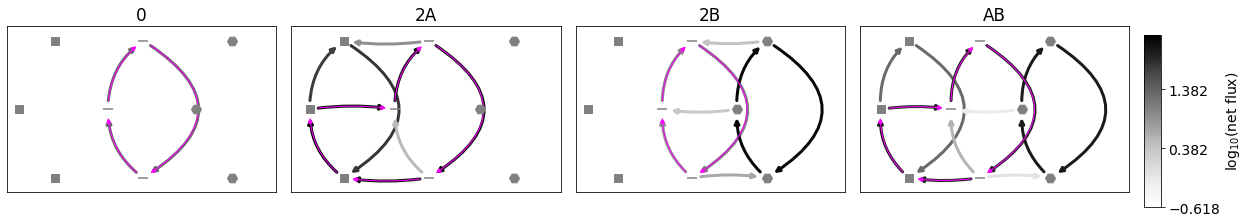

[ 4.86314159 31.36074243 17.83703288 47.41902089]
[1.91777657e+03 5.72846581e+01 1.00000000e+00 4.74190209e+01]
[1.91777657e+03 5.72846581e+01 1.00000000e+00 4.74190209e+01]
[1.         1.17896376 1.         1.17896376 1.         1.17896376]
[1061.775389  8941.6265765 1061.775389  8941.6265765 1061.775389
 8941.6265765]
[0.13437471468515355, 0.25482830196967843, [2.9766095383369255, 19.01657807339824, 17.49331948788664, 20.8729191333728]]


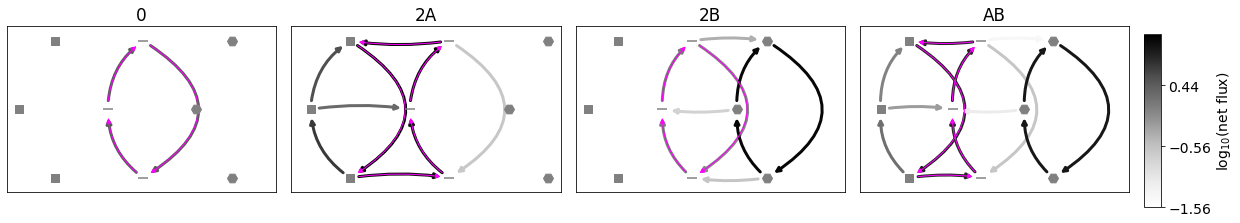

[1.27312125e+02 1.00000000e+00 1.00000000e+04 1.93006341e+02]
[ 214.89400657 1000.           10.          193.00634124]
[ 214.89400657 1000.           10.          193.00634124]
[  1.         122.96230163   1.         122.96230163   1.
 122.96230163]
[  180.34787682 10000.           180.34787682 10000.
   180.34787682 10000.        ]
[0.166638642946423, 0.2573123278181386, [0.704224171185188, 2.455282100999018, 2.305716454460746, 2.755907443447911]]


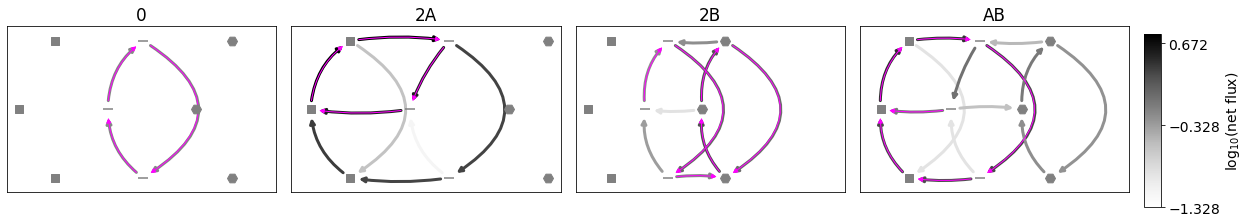

sameAD_difbp


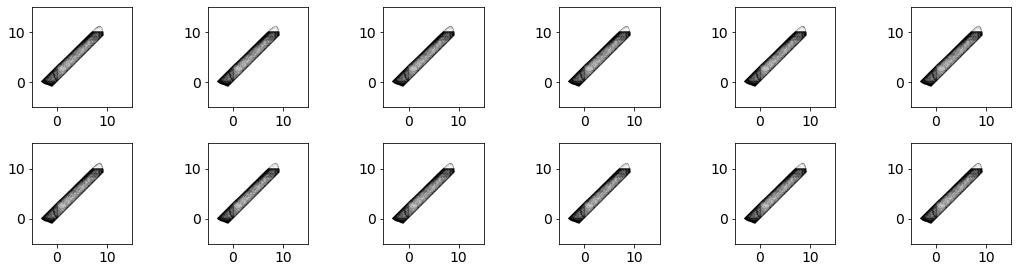

[ 25.65447876   1.5207346    1.         325.39403357]
[9.86004037e+01 6.09534358e+00 1.00000000e+00 5.19859869e+03]
[9.86004037e+01 6.09534358e+00 1.00000000e+00 5.19859869e+03]
[  26.74765471   60.03392385   20.65279294  198.65486337   10.59984121
 4147.6573641 ]
[1.00000000e+00 3.10705814e+00 1.00000000e+04 3.64849869e+01
 1.36689571e+02 5.28649828e+02]
[0.17949932000157698, 0.38111047235680534, [1.4290828865685654, 3.787815994903649, 3.293804884941365, 4.289666735649144]]


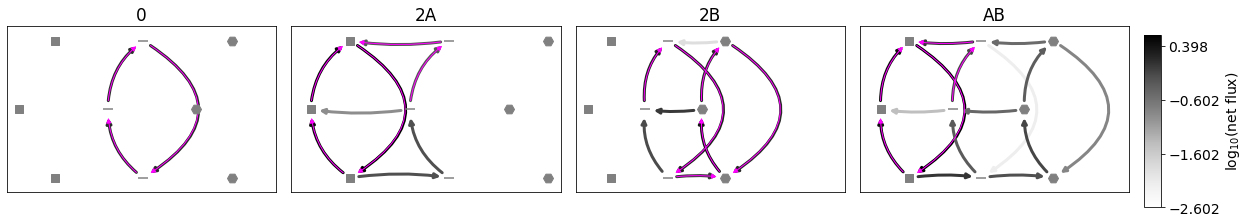

[419.858966    12.35657165 728.1736774   22.01197526]
[10000.         10000.            10.42687825  5470.47502857]
[10000.         10000.            10.42687825  5470.47502857]
[1.00000000e+00 2.17205662e+00 1.92423255e+02 1.00000000e+04
 4.37481727e+00 6.36579781e+01]
[8.53357656e+02 4.57356207e+02 7.23954960e+01 1.90204819e+02
 2.75876031e+00 6.11359029e+03]
[0.4019649461402018, 0.7403293112468434, [4.8185705991180985, 22.14158621878752, 17.51261124513056, 29.25581738168452]]


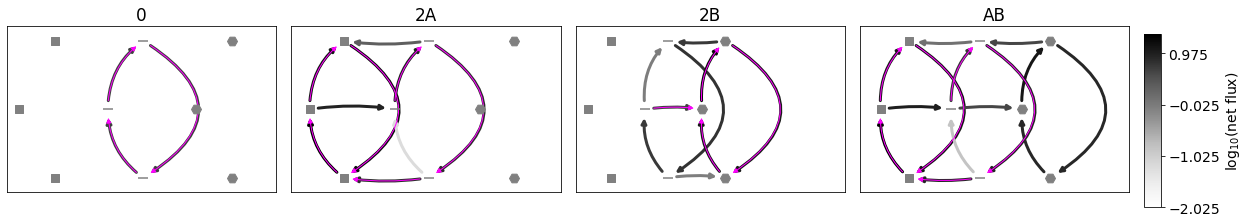

[ 6.79945285 32.1204364   1.14658336 29.93293346]
[6.79945285e+03 1.97701228e+02 1.14658336e+00 2.99329335e+01]
[6.79945285e+03 1.97701228e+02 1.14658336e+00 2.99329335e+01]
[ 2440.21315607   464.14281756    10.54155494  8338.70305023
 10000.           150.65759172]
[1.56705011e+01 1.00000000e+04 1.30765466e+02 1.00000000e+00
 1.89096720e+00 5.29990150e+03]
[0.6322554908175511, 0.749478510403363, [4.6030966907806885, 14.795269407229906, 13.640655241665273, 22.932465314194726]]


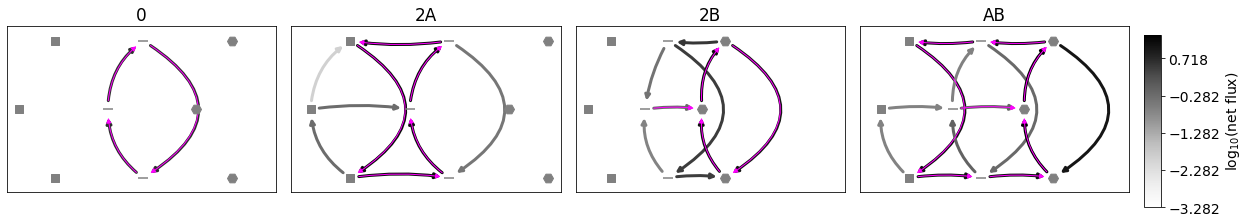

[1.28340183e+02 1.00000000e+00 2.98098460e+03 3.59986114e+01]
[6343.24473489 1000.            8.96461425 4963.93995838]
[6343.24473489 1000.            8.96461425 4963.93995838]
[1.00000000e+00 1.00000000e+00 1.96392749e+00 1.00000000e+04
 1.00000000e+00 1.00000000e+04]
[1.00000000e+00 1.00000000e+04 9.60722663e+03 1.51838157e+00
 1.00000000e+04 1.00000000e+00]
[0.9094908289583984, 0.904745367642032, [0.5949562502931426, 1.2989376541766953, 1.3032172885194093, 2.4399016841917076]]


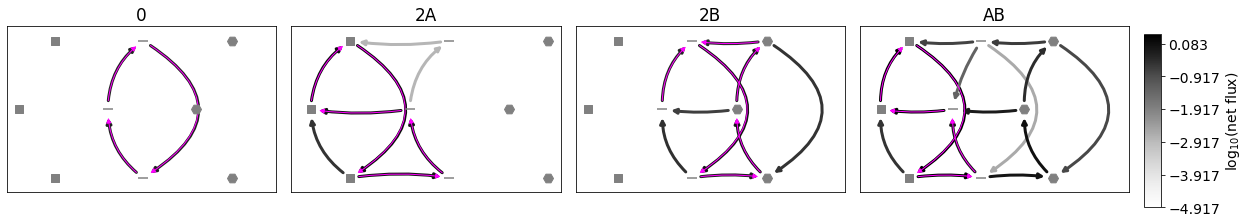

[31.54280084  1.89512845  1.         30.34623018]
[393.99551839   7.10717634   1.          30.34623018]
[393.99551839   7.10717634   1.          30.34623018]
[1.00000000e+00 3.18302621e+01 1.09293621e+03 8.80604396e+01
 1.00000000e+00 2.59984408e+02]
[ 35.77316783   1.61916254   2.77656682 219.27503311   2.37177687
  15.43136242]
[0.059995935751556095, 1.2167750738653185, [1.6852908014178287, 5.032691466901971, 2.2572262257961717, 5.246393759368648]]


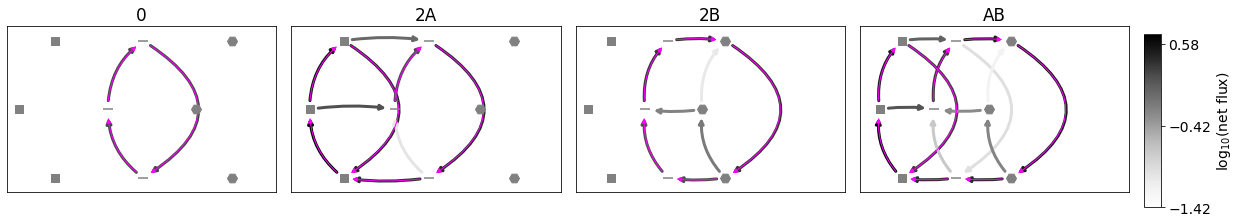

[322.48854744  10.66896499  37.99184261  48.4507707 ]
[2455.13946961  187.25251189    5.42856254  826.70360406]
[2455.13946961  187.25251189    5.42856254  826.70360406]
[  26.91490471  377.20111524 1838.6105949  3164.47030547    3.23253281
   52.57388817]
[1845.78067654  103.25416769    2.08333778  386.50913482    7.40088572
  773.30229038]
[0.20828341272525952, 1.2390131977827168, [8.34016515816349, 56.47329830748106, 27.64156133882291, 65.244319856357]]


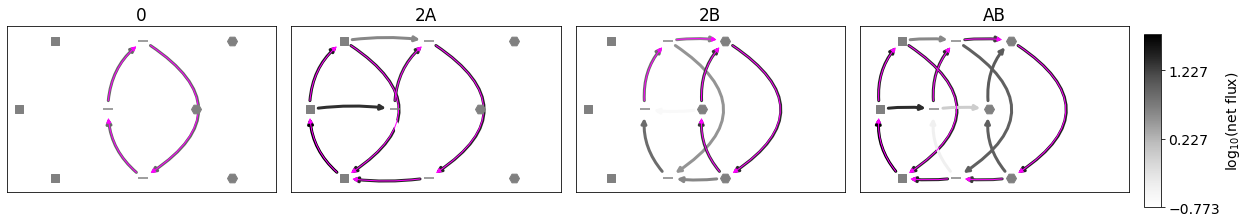

[1776.49753347    9.78427788   22.10342816    8.62244541]
[6.34033591e+03 1.21593779e+02 1.41856167e+00 3.77741369e+01]
[6.34033591e+03 1.21593779e+02 1.41856167e+00 3.77741369e+01]
[1.59863002e+00 5.57971016e+03 1.00000000e+04 4.27720636e+02
 3.59054222e+02 1.11188986e+00]
[1997.05908191 5296.71357787  105.63778888   73.13015534  110.36578138
 2014.70254955]
[0.9715806155646675, 1.2526272428433332, [4.54159290746336, 9.546380514415825, 7.856611460754579, 18.720336443400704]]


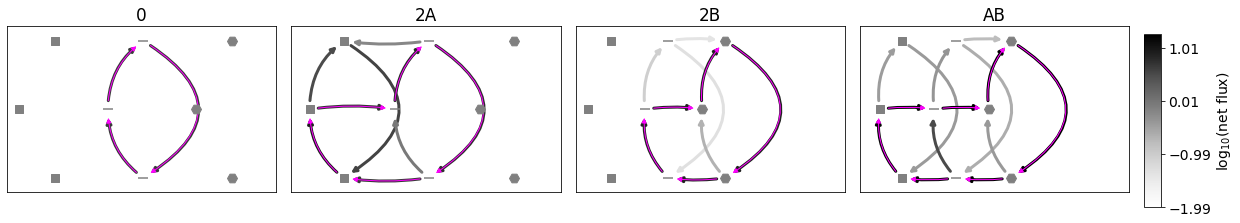

[   37.80416573 10000.         10000.            17.02352983]
[   37.80416573 10000.            10.            34.22591435]
[   37.80416573 10000.            10.            34.22591435]
[1.94391968e+03 1.00000000e+00 1.06981540e+02 1.00000000e+00
 1.00000000e+00 1.00000000e+04]
[8.76388098e+02 8.12281518e+02 1.07328298e+02 2.50470661e+03
 1.00000000e+04 1.07047806e+00]
[0.49136094879828934, 1.3810576369850585, [0.06400469939207887, 0.6321878026774266, 0.3412091918990169, 0.8887108792584932]]


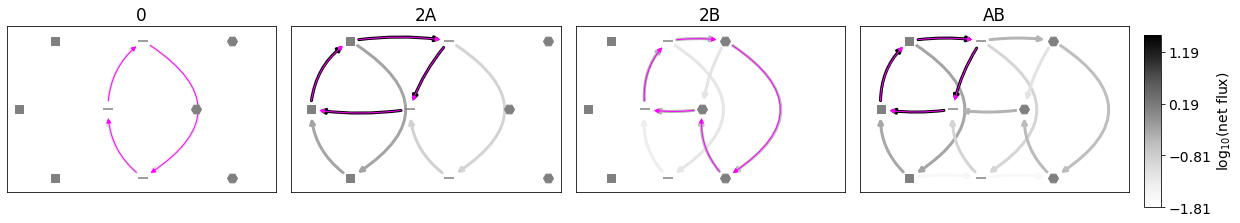

[69.05911555  1.          1.          1.        ]
[1.00000000e+04 3.26473223e+00 1.00000000e+00 1.92534398e+02]
[1.00000000e+04 3.26473223e+00 1.00000000e+00 1.92534398e+02]
[1.00000000e+00 1.25876190e+02 1.00000000e+00 2.56198436e+03
 7.19458388e+02 7.70778881e+03]
[1.00000000e+04 3.05767713e+00 1.00000000e+00 2.14767297e+03
 3.97559948e+01 1.00000000e+04]
[0.9595151073718282, 1.4354392001559866, [0.4928631699664626, 1.405357066462421, 1.0104602976217276, 2.7329363075269577]]


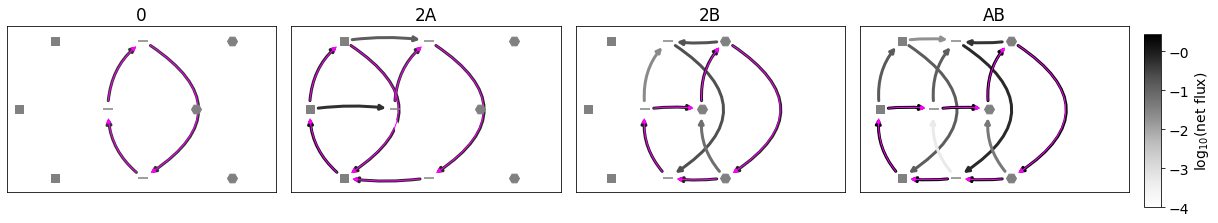

[26.41058395  2.49913295  9.99344355  3.7620906 ]
[2214.22797727  252.40921264    2.24964569   45.28676251]
[2214.22797727  252.40921264    2.24964569   45.28676251]
[  1.03007059 244.96788044   1.         110.33662781  12.6889167
  48.58963214]
[198.97799468   1.         818.95339615  27.012333     1.
 106.55604079]
[1.0027656684341064, 1.4356187283263908, [1.2431762430267348, 5.6959301908734075, 4.21951857656619, 11.413719697764426]]


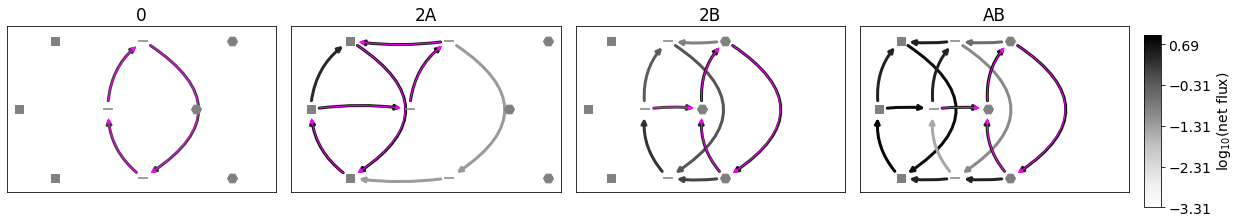

[446.26217711   9.64474529   1.          22.01197526]
[3.47609743e+03 2.89379741e+03 1.00000000e+00 3.09016874e+03]
[3.47609743e+03 2.89379741e+03 1.00000000e+00 3.09016874e+03]
[1.54904928e+02 4.48094150e+01 1.78546144e+02 1.31888630e+03
 4.48782891e+00 1.00000000e+04]
[7.42756621e+00 2.29834357e+02 1.99977852e+02 1.00000000e+04
 5.12203745e+01 6.50421607e+00]
[1.2789875321930901, 1.433721169591743, [6.602584001719166, 31.67048040687106, 28.44953582806884, 76.85431613311971]]


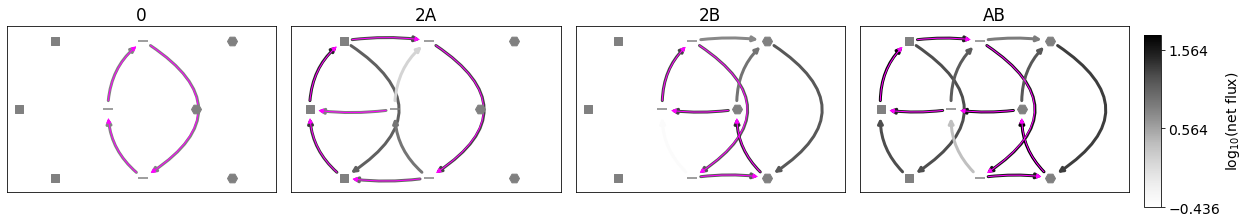

[ 49.3493808   26.59097135 110.92815897  86.80675499]
[1.00000000e+04 1.14161673e+02 1.00000000e+00 1.71519844e+03]
[1.00000000e+04 1.14161673e+02 1.00000000e+00 1.71519844e+03]
[1.00000000e+04 1.18139877e+02 7.83895099e+01 1.36507247e+01
 1.00000000e+00 1.00000000e+04]
[6.18655675e+01 7.00986468e+02 1.62196325e+00 2.58359529e+02
 1.00000000e+04 4.69585618e+01]
[1.3374320664533361, 1.527054346354023, [10.494862986057315, 40.49969672839944, 35.51156212839506, 102.3431877945503]]


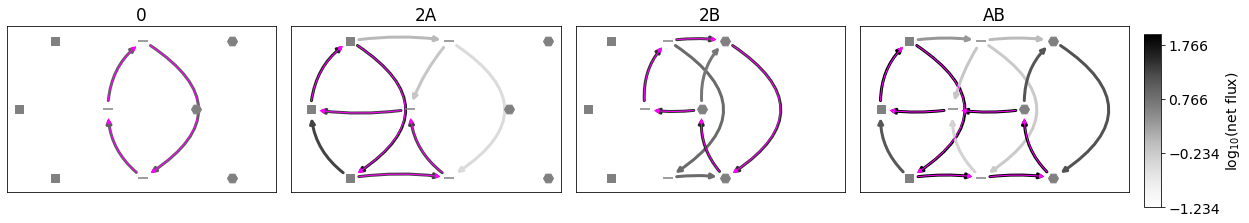

[ 340.55451068   23.29850893 2382.72319711  822.18539358]
[6.40855441e+02 5.02581520e+02 2.38272320e+00 1.00000000e+04]
[6.40855441e+02 5.02581520e+02 2.38272320e+00 1.00000000e+04]
[8.71769715e+02 3.46790134e+02 4.28275734e+01 2.78762205e+03
 1.93102604e+00 3.16779635e+03]
[1.65972613e+01 2.49607146e+02 1.00000000e+00 1.00000000e+00
 1.00000000e+04 5.07661953e+00]
[1.2858135601778058, 1.5543120148379128, [17.99091248667433, 94.03628651784993, 78.0673400131979, 229.27881106008718]]


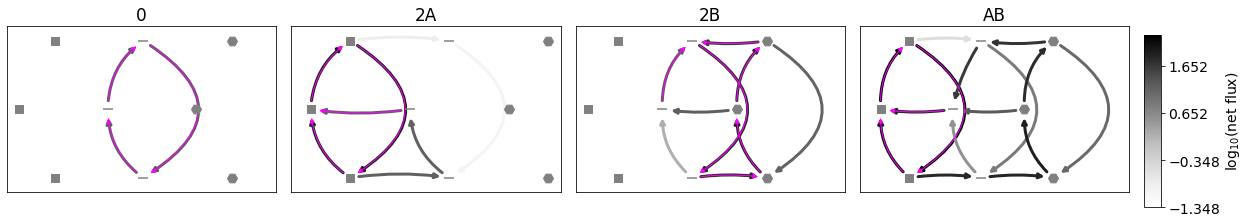

[1.00000000e+00 1.00000000e+00 5.64781847e+01 7.83673758e+03]
[4.58431252e+00 1.00000000e+03 1.66880626e+01 1.00000000e+04]
[4.58431252e+00 1.00000000e+03 1.66880626e+01 1.00000000e+04]
[3.20737580e+00 1.00000000e+04 1.00000000e+04 9.84883296e+02
 3.89317256e+00 6.87536078e+00]
[1.94656566e+03 3.61369460e+01 1.00000000e+00 7.96104326e+01
 3.11978672e+02 1.00000000e+00]
[1.7221656495574915, 1.7663811101575755, [0.4981730864176239, 1.285236330608667, 1.246444121248224, 4.2403969313874414]]


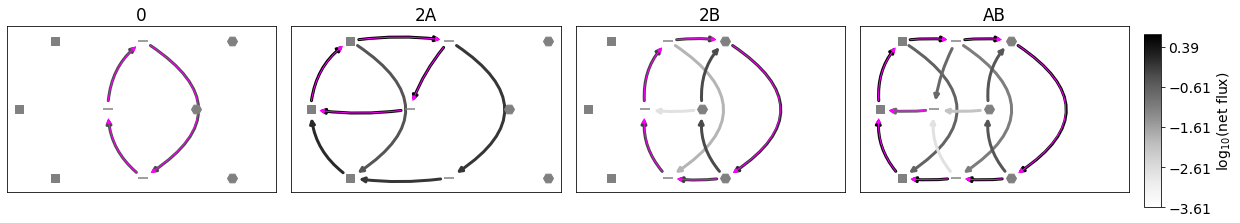

[520.77448855  15.35393156 288.68126466  20.23827647]
[1.16151465e+03 6.15798652e+01 1.89205268e+00 3.49537048e+03]
[1.16151465e+03 6.15798652e+01 1.89205268e+00 3.49537048e+03]
[2.26178925e+01 1.00000000e+04 2.79774411e+01 1.00000000e+00
 2.87038771e+03 9.45665012e+01]
[5.08464791e+03 1.14518289e+02 2.17062492e+01 5.27219855e+00
 9.14364886e+00 1.00000000e+04]
[1.7088602661709977, 1.8563200853457988, [6.951606136284568, 16.963307874791692, 15.315130988860545, 55.4534719886864]]


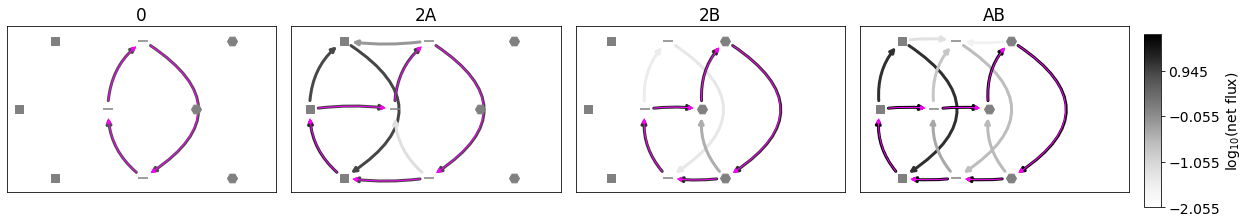

[211.11900948  40.89890495 814.1174879  143.96058625]
[ 211.11900948  597.21362125    2.3827232  1686.14476831]
[ 211.11900948  597.21362125    2.3827232  1686.14476831]
[1.00000000e+04 3.24368200e+03 5.65541022e+01 2.24467547e+03
 1.00000000e+00 7.31511200e+02]
[1.84290291e+01 1.20764100e+03 1.00000000e+00 1.00000000e+00
 1.39776354e+03 2.15354123e+01]
[1.2384148078546766, 2.0393364432831422, [15.893184260818625, 52.69898287122528, 30.248287810165863, 124.33753045702505]]


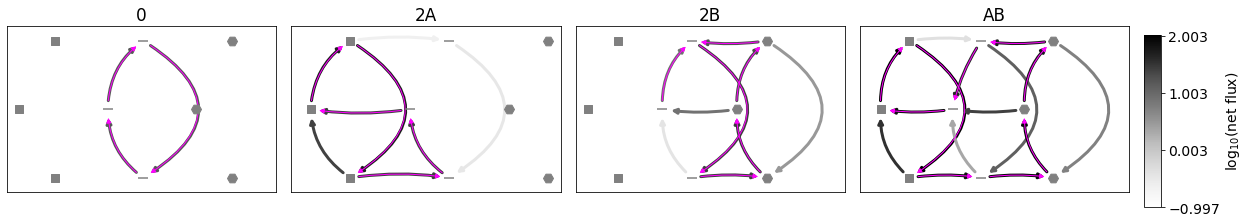

[1. 1. 1. 1.]
[1000.            4.34264729    1.            9.22334115]
[1000.            4.34264729    1.            9.22334115]
[1.23676060e+03 5.21024738e+01 1.00000000e+00 1.00000000e+00
 1.00000000e+00 2.04759874e+02]
[  1.         119.78082433   1.           3.78076852 392.36627632
   1.        ]
[1.559921390767258, 2.258533807233348, [0.25, 0.9646885234499625, 0.5944068685862038, 2.844266206852971]]


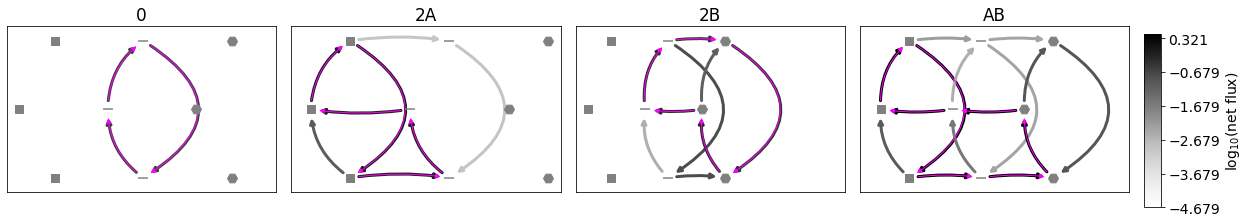

[1.77649753e+03 1.72996617e+00 4.23442257e+01 8.62244541e+00]
[1.00000000e+04 1.42416864e+01 1.00000000e+00 1.56784725e+02]
[1.00000000e+04 1.42416864e+01 1.00000000e+00 1.56784725e+02]
[1.88112229e+00 8.36184068e+03 5.14294517e+03 4.27720636e+02
 3.59054222e+02 6.28986648e+00]
[1997.05908191 1338.06559412  105.63778888 1843.47634751   57.69014157
 1515.73183797]
[0.2685913388873522, 2.3099224886028464, [1.4340008441604886, 7.0586417704344075, 1.714822742599528, 8.503058977648463]]


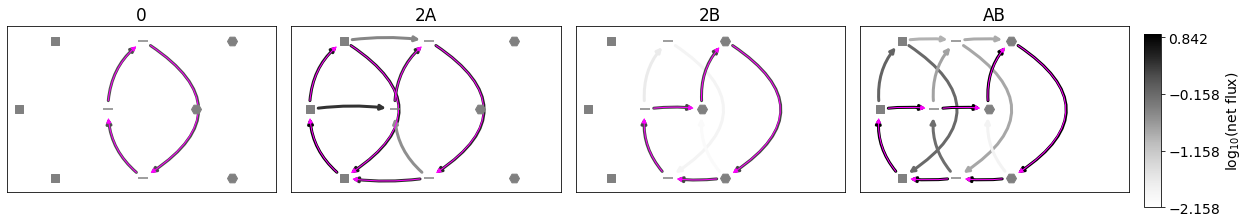

[1. 1. 1. 1.]
[ 26.68800288 182.1967445    1.          11.50624901]
[ 26.68800288 182.1967445    1.          11.50624901]
[5.03817562e+00 1.00000000e+00 1.00000000e+04 1.00000000e+00
 1.00000000e+00 1.00000000e+04]
[1.00000000e+00 2.03463532e+02 1.00000000e+00 1.00000000e+00
 8.10464680e+03 1.00000000e+00]
[0.9734540445049039, 2.3507372060425986, [0.25, 2.4103335006840543, 0.9278410712445055, 4.732776585827362]]


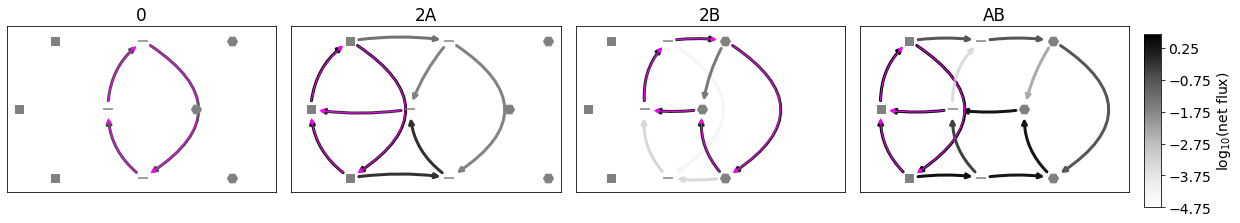

[ 1.          1.          3.61338308 53.5447614 ]
[   5.52294674 1000.            3.61338308 1933.55796586]
[   5.52294674 1000.            3.61338308 1933.55796586]
[2.62178186e+03 1.00000000e+00 2.64503561e+00 6.69070981e+03
 4.71709162e+02 4.51616007e+03]
[9.62596938e+00 1.00000000e+04 5.52533971e+03 1.10223177e+01
 1.00000000e+00 2.49738133e+00]
[1.474135280494057, 2.433943887493054, [0.47934976248173994, 1.9262113726555115, 0.9903136424232065, 5.351344125467938]]


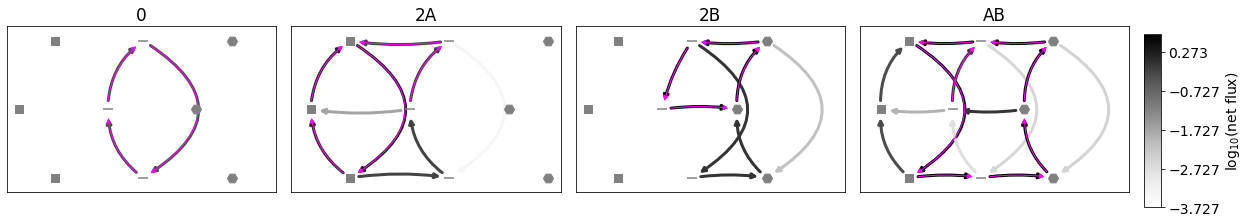

[  2.51656507   3.17143456  82.17068651 364.38000173]
[ 26.55148218  30.74100194  82.17068651 700.71578149]
[ 26.55148218  30.74100194  82.17068651 700.71578149]
[1.00000000e+04 8.54045668e+03 1.00000000e+00 5.72622779e+03
 1.00000000e+00 8.62281858e+03]
[  5.93199156 185.6407366  963.62301234   2.13101548  41.43702679
   2.79542492]
[1.2753641246403256, 2.452625695694643, [1.2421809745125125, 4.248106141513334, 1.8784702167495018, 10.282961652647543]]


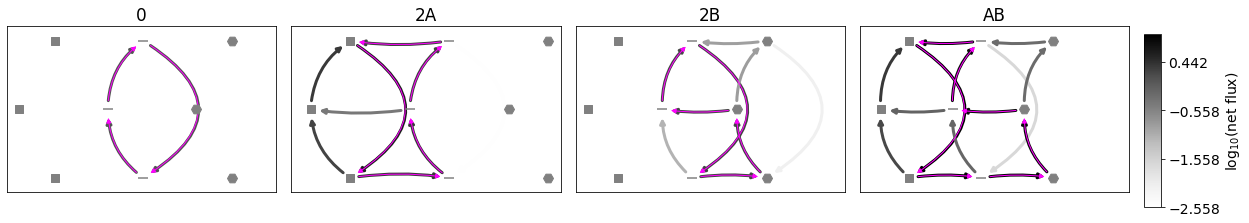

[  1.           1.         180.15807867 411.60174362]
[   5.52294674 1000.            3.48820595 1933.55796586]
[   5.52294674 1000.            3.48820595 1933.55796586]
[2.61961731e+03 1.17180254e+01 1.00000000e+00 1.00000000e+04
 2.71706609e+03 1.00000000e+04]
[1.00000000e+00 1.00000000e+04 1.20095234e+02 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
[2.306780093749218, 2.5563305410648725, [0.4098143114890701, 1.043797282675235, 0.8779989405235469, 5.16447481079677]]


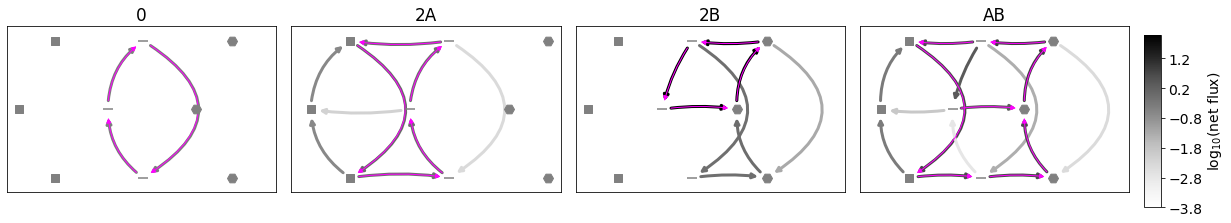

[9.29691185e+00 1.00000000e+04 7.77646739e+00 3.64988224e+01]
[3.26844284e+02 1.00000000e+04 7.77646739e+00 8.23128624e+01]
[3.26844284e+02 1.00000000e+04 7.77646739e+00 8.23128624e+01]
[1.00000000e+00 5.82975384e+01 5.75665998e+00 8.33870305e+03
 1.24725780e+03 5.54282331e+02]
[  1.           1.         910.71714767 329.63690693   1.
 204.29404079]
[0.4946869989841143, 2.6227524771353017, [6.329990754142464, 36.10339505452862, 8.259171836002707, 50.870226194947136]]


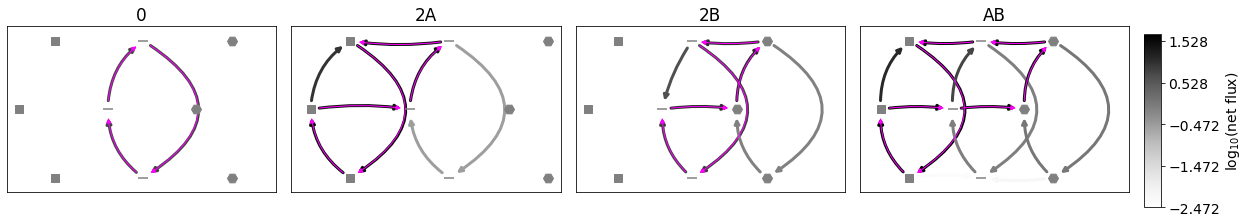

[1.00000000e+04 4.08573294e+00 1.00000000e+00 6.87598105e+00]
[1.00000000e+04 4.84148255e+01 1.00000000e+00 2.81883856e+02]
[1.00000000e+04 4.84148255e+01 1.00000000e+00 2.81883856e+02]
[  99.4680097  3355.31305831  751.90592052  213.70455566 3942.7036143
   27.95915766]
[1.00000000e+04 7.93814029e+01 1.00000000e+04 4.24817395e+00
 1.00000000e+00 6.64616996e+02]
[2.2326052662347324, 2.648950362348335, [2.5621155247639087, 8.613262315391545, 6.4540943707832925, 40.48077583537146]]


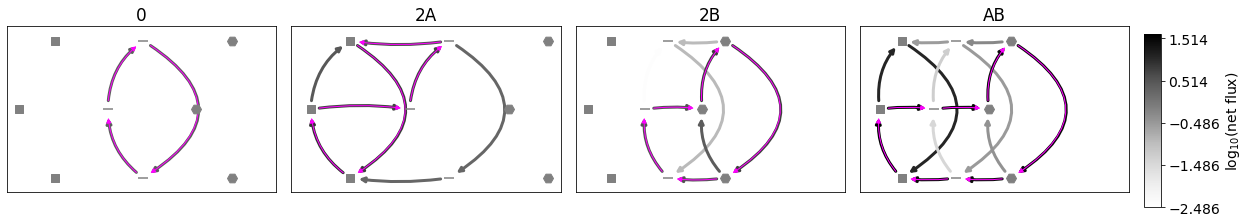

[3731.58413996  629.67261482   15.13082685   61.20556556]
[1.00000000e+04 5.21285523e+03 4.70062567e+00 5.15577841e+02]
[1.00000000e+04 5.21285523e+03 4.70062567e+00 5.15577841e+02]
[3.12943518e+03 1.00000000e+00 4.03326385e+02 1.00000000e+00
 3.39559330e+01 1.00000000e+04]
[7.79892596e+01 1.00000000e+00 4.10988680e+03 1.00000000e+04
 1.00000000e+04 1.30296044e+01]
[0.0975154848112708, 2.704304332474699, [54.76228758920813, 392.183317447017, 64.38244720001624, 419.60842727317674]]


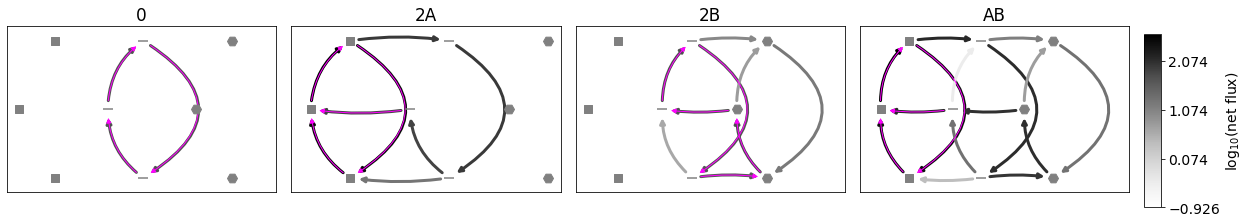

[378.75436037   4.02389766   1.           2.78217808]
[4.75361436e+02 1.89997889e+02 1.00000000e+00 2.78217808e+03]
[4.75361436e+02 1.89997889e+02 1.00000000e+00 2.78217808e+03]
[2.91971069e+01 1.62375187e+02 1.00000000e+04 4.18040751e+01
 1.00000000e+00 1.00000000e+04]
[  1.         416.66373927 812.85079674   1.11337055 895.88783809
   7.69981626]
[1.9163397676636522, 2.726377508902643, [1.6352291028725516, 6.55024759511947, 3.736044656154751, 24.72483877267045]]


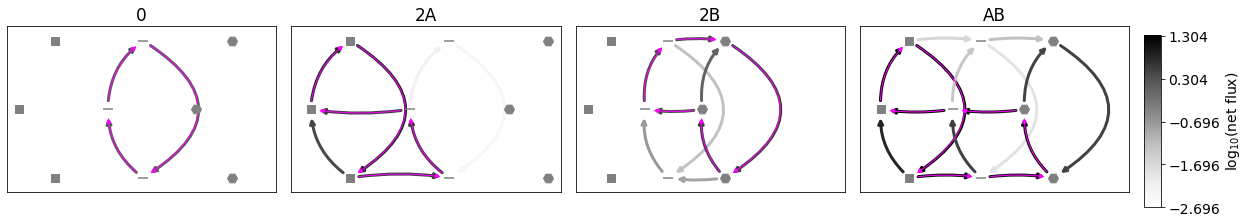

[ 205.89744752  193.28242929    7.95138914 6096.62321037]
[8.04950642e+03 1.00000000e+04 1.00000000e+00 6.41858858e+03]
[8.04950642e+03 1.00000000e+04 1.00000000e+00 6.41858858e+03]
[1.00000000e+04 1.02355402e+00 1.72021763e+00 1.00000000e+04
 3.15371775e+00 1.35780217e+02]
[6.48455808e+00 1.00000000e+04 1.00000000e+04 8.79584170e+02
 5.26767407e+00 2.92178048e+00]
[2.654479024752715, 2.7446152937614112, [98.03035074980396, 346.9597350457192, 325.9457756442086, 2184.5243340524944]]


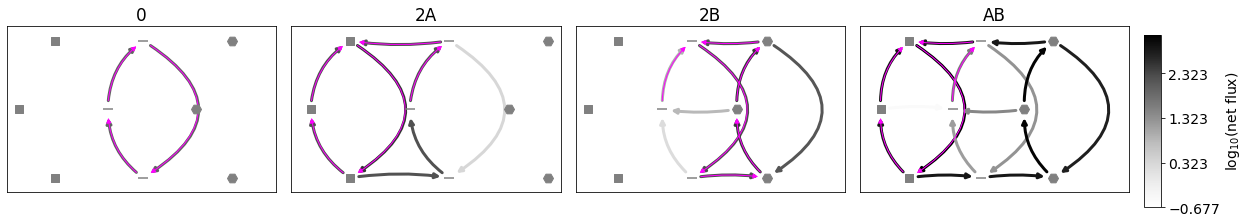

[1.00000000e+00 4.73362345e+00 5.85562860e+01 4.01893898e+03]
[1.00830479e+01 2.71565414e+03 1.00000000e+00 4.01893898e+03]
[1.00830479e+01 2.71565414e+03 1.00000000e+00 4.01893898e+03]
[1.00000000e+04 1.00000000e+04 9.21222343e+00 4.08002541e+02
 1.00000000e+00 9.32409574e+02]
[1.50016021e+00 5.77047776e+02 1.85066709e+01 1.00000000e+00
 1.85939545e+03 1.78186212e+01]
[0.2508125305551559, 2.7609282408282434, [0.8156117450640774, 7.898337536591501, 1.3864862534653428, 9.39805071780051]]


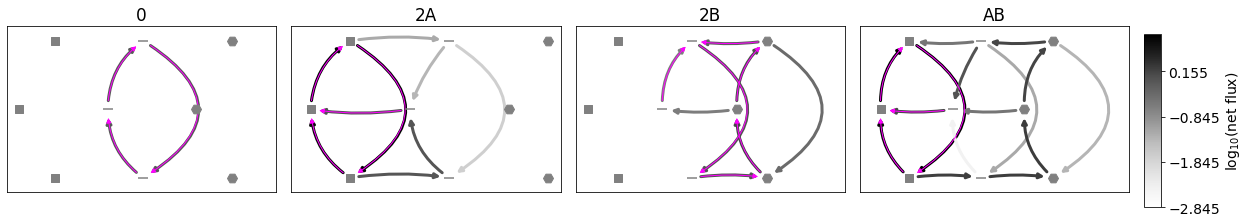

[645.26963619   2.49913295   2.22632503   1.        ]
[645.26963619  18.58722954   1.          45.28676251]
[645.26963619  18.58722954   1.          45.28676251]
[107.16619181   1.           9.37660661   8.62115259   2.16464841
 291.82529849]
[1.72899625e+00 4.71541941e+02 1.00000000e+00 1.00000000e+04
 7.96895836e+02 4.85896321e+01]
[2.228185011853798, 2.8286854502683005, [0.711673496509345, 2.4566487547128646, 1.6202216170447985, 11.51048414775576]]


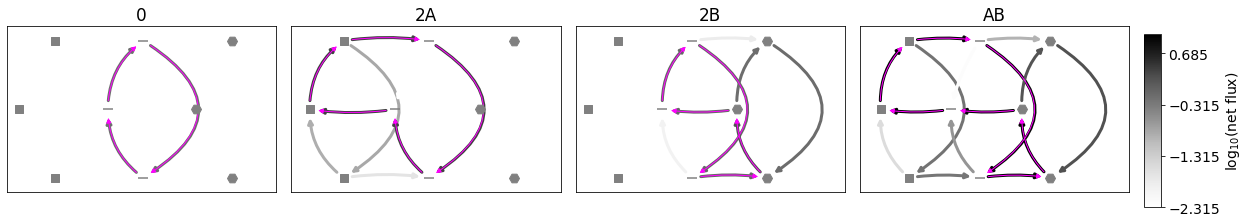

[ 26.30254466 130.5542762   48.03908007 781.52799399]
[ 4587.66897779   768.12628388    23.85043308 10000.        ]
[ 4587.66897779   768.12628388    23.85043308 10000.        ]
[2.23307376e+03 7.33069307e+02 3.16517015e+01 1.00000000e+04
 1.00000000e+00 4.07734738e+01]
[1.00000000e+00 1.00000000e+04 1.00000000e+04 3.83257117e+03
 3.87957324e+01 2.69338473e+00]
[1.8545045827316664, 2.9074026351180935, [20.285911557163747, 116.24166949811661, 56.028364153095445, 420.36189899196023]]


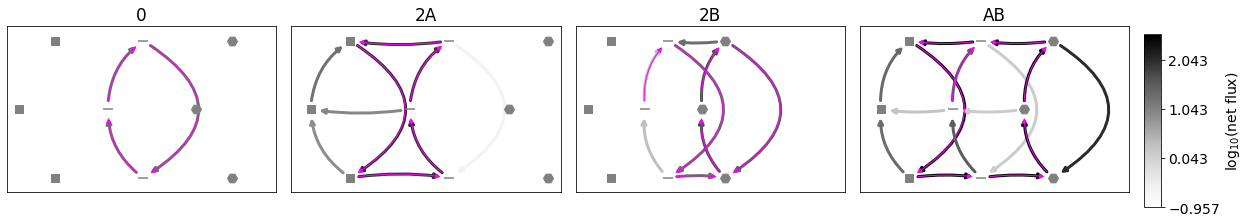

[ 1.71098496  1.         78.40512079 67.14364958]
[  48.13688084 1000.            8.82220796  141.09802944]
[  48.13688084 1000.            8.82220796  141.09802944]
[1.00000000e+04 8.78259666e+03 1.00000000e+00 1.81262169e+03
 1.01238858e+01 1.00000000e+04]
[1.00000000e+00 7.55481916e+03 1.00000000e+00 1.20514536e+00
 3.37012301e+02 3.24337273e+03]
[2.354223621391137, 2.9543048878800127, [0.4382433211513465, 1.2233100300743607, 0.8070381695574204, 6.255016550047676]]


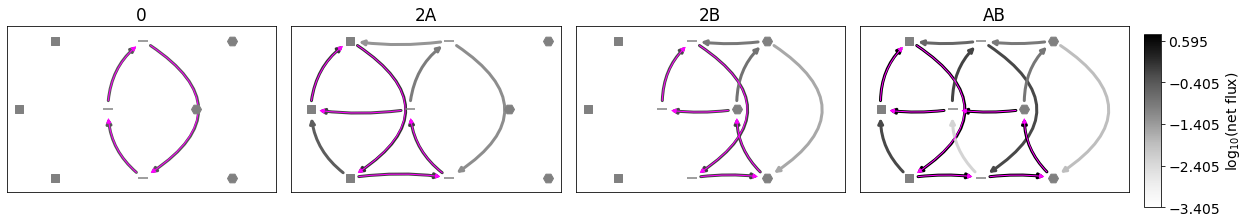

[ 10.60375171   2.96993492 107.70040049   1.22121471]
[10.60375171  7.02269296  1.          1.39543021]
[10.60375171  7.02269296  1.          1.39543021]
[1.00000000e+04 1.25230754e+02 2.77262658e+00 1.00000000e+04
 1.00000000e+00 1.98468850e+00]
[1.00000000e+00 7.88231914e+03 4.73800081e+02 4.05104671e+00
 7.81489613e+03 2.94811698e+00]
[0.14483108953170135, 2.976605764419598, [0.10452758776642483, 0.8049706655306115, 0.1130657156998026, 0.8899765355128035]]


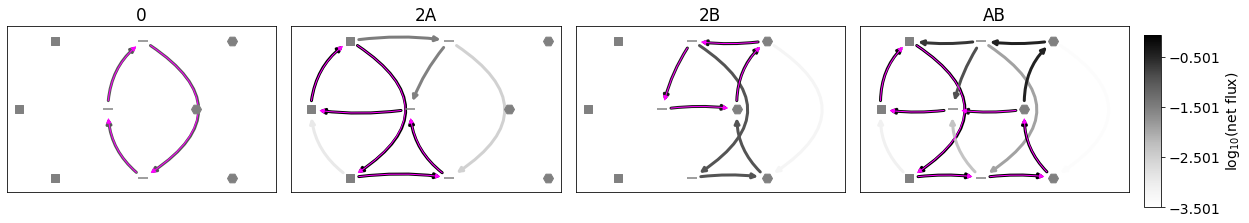

[3215.94019636   28.38573105  104.21499651   13.05646489]
[1.00000000e+04 1.38312310e+02 2.81668641e+00 4.62684052e+02]
[1.00000000e+04 1.38312310e+02 2.81668641e+00 4.62684052e+02]
[1.00000000e+04 1.24489189e+02 9.29769006e+01 5.13576882e+01
 1.57829581e+00 3.90249900e+03]
[3.33522641e+01 2.00417127e+03 2.05077841e+01 1.82259804e+02
 1.00000000e+04 1.00000000e+00]
[1.7338895190431287, 2.980012957095287, [8.725067074979483, 30.954365346247933, 13.04972533710631, 102.96145200744904]]


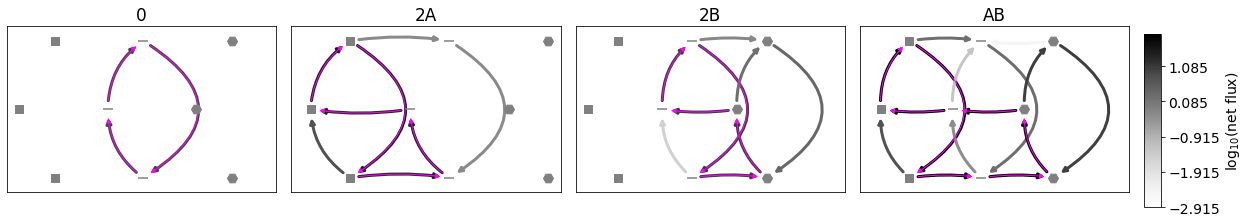

[   93.27069238    45.21792611    10.97937531 10000.        ]
[2.57026732e+03 5.02434004e+03 2.90170450e+00 1.00000000e+04]
[2.57026732e+03 5.02434004e+03 2.90170450e+00 1.00000000e+04]
[3.62380593e+00 3.53685311e+03 4.06383565e+03 3.70888617e+02
 1.00000000e+04 9.89337319e+00]
[1.08431191e+03 1.85477008e+01 3.16517015e+01 1.00000000e+04
 1.00000000e+00 2.14397059e+02]
[2.864578650235786, 2.9870092424772277, [30.350509500537417, 120.52808403769153, 110.72175787481667, 877.8339065386048]]


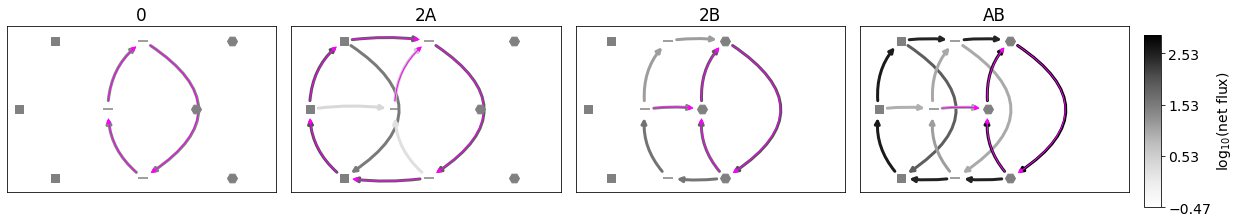

[  1.         889.42016143   1.           1.        ]
[1.11228675e+02 1.00000000e+04 1.00000000e+00 1.41291695e+01]
[1.11228675e+02 1.00000000e+04 1.00000000e+00 1.41291695e+01]
[7.25766690e+00 2.28003271e+00 1.07686619e+02 8.18966267e+01
 2.84945710e+01 5.97934388e+03]
[  261.88058686 10000.           132.19850327 10000.
   117.86391223    11.45189119]
[1.679303529500688, 3.0490892936088625, [0.33320845480038563, 2.811762501621153, 1.088007858328304, 9.005324542882612]]


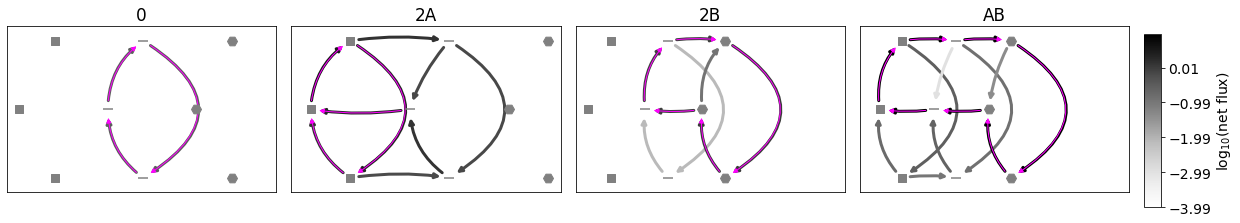

[1.00000000e+04 8.74013961e+00 2.72869523e+03 1.00000000e+00]
[1.00000000e+04 5.15958553e+01 3.81993852e+01 9.01297603e+00]
[1.00000000e+04 5.15958553e+01 3.81993852e+01 9.01297603e+00]
[1.00000000e+04 1.00000000e+00 1.00000000e+04 1.88237934e+01
 2.75235335e+00 1.00000000e+04]
[2.59579705e+01 1.00000000e+04 1.00622196e+01 6.42725467e+02
 3.81496339e+03 1.00000000e+00]
[0.7641849693960621, 3.0682840881175357, [0.7207808916725805, 4.460497783928279, 0.9031926198243942, 7.575755084224728]]


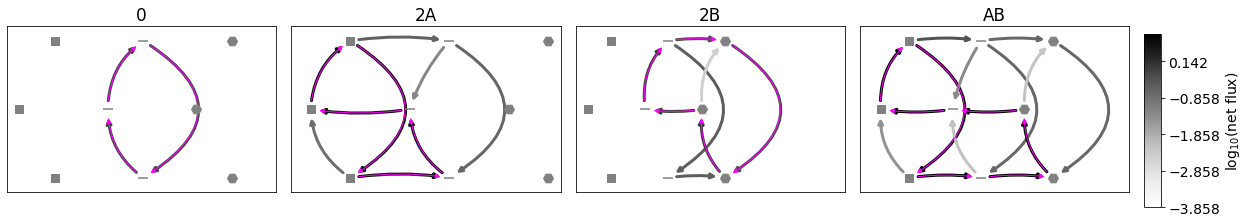

[560.05080629  21.57816176   4.62736984   2.78217808]
[1.00000000e+04 9.42101964e+01 4.56491313e+00 2.78217808e+03]
[1.00000000e+04 9.42101964e+01 4.56491313e+00 2.78217808e+03]
[2.91971069e+01 5.93945741e+01 1.04440723e+03 1.95985731e+03
 1.00000000e+00 1.00000000e+04]
[1.00000000e+00 2.89470046e+03 6.27575806e+02 1.00000000e+00
 8.43954842e+02 2.31300405e+02]
[0.6218894096084007, 3.1915967267596446, [2.435880978540458, 21.64641162193618, 3.6460861842987016, 33.31143017725254]]


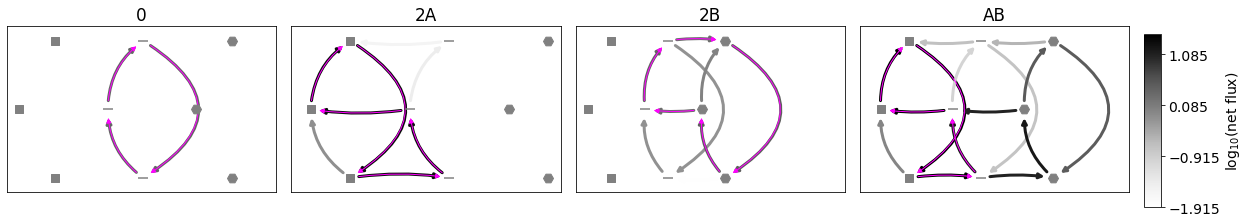

[1131.45034405   14.12670344   82.28263986    8.23482338]
[ 4741.021252   10000.            65.05486694   238.36184341]
[ 4741.021252   10000.            65.05486694   238.36184341]
[10000.            16.83014427 10000.            15.74525883
   111.04845248 10000.        ]
[9.34053059e+00 1.00000000e+04 3.60049013e+01 6.56607352e+03
 4.33246510e+02 2.14494918e+02]
[2.2694837073911294, 3.205755354556334, [4.9520043994070795, 25.16447442561767, 13.150492394955254, 121.33065298985899]]


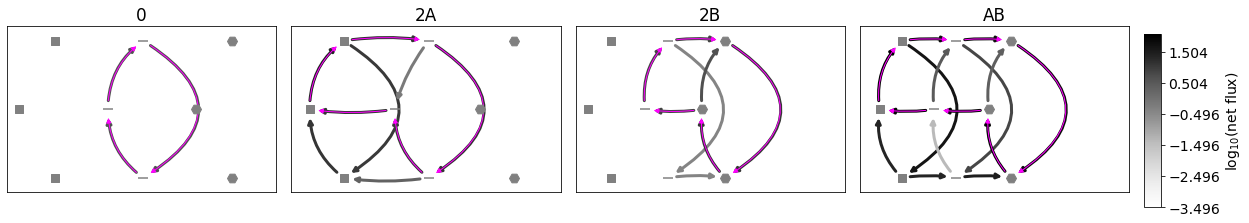

[2.65102021e+00 1.71818390e+03 2.57500948e+00 1.00000000e+00]
[2.70351731e+02 5.50839305e+03 2.57500948e+00 2.51098996e+01]
[2.70351731e+02 5.50839305e+03 2.57500948e+00 2.51098996e+01]
[1.08290607e+00 1.21308620e+02 1.00000000e+00 1.00000000e+04
 2.96842329e+03 6.20204561e+01]
[  1.16828281  44.47633981 747.2210134    6.44060212   2.77660255
  66.17744348]
[2.813881554834659, 3.2216532164423697, [0.42569077501169306, 3.0918107457679667, 2.330565969833156, 21.740806691025075]]


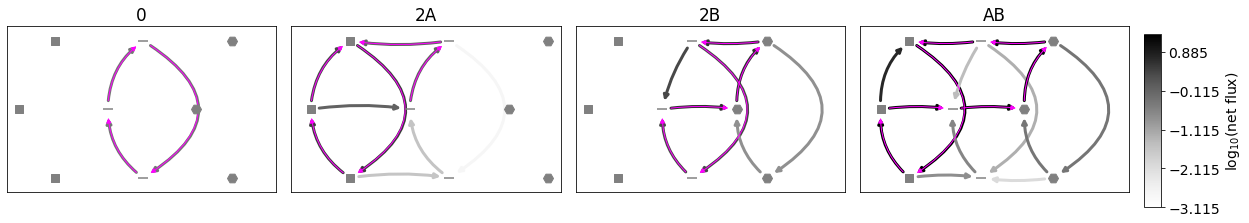

[55.95250631  1.          5.26613581  1.        ]
[1.00000000e+04 1.00000000e+03 1.00000000e+00 4.52867625e+01]
[1.00000000e+04 1.00000000e+03 1.00000000e+00 4.52867625e+01]
[1.35948470e+02 1.52689260e+02 1.00000000e+04 1.01933064e+01
 1.00000000e+00 1.20011918e+03]
[1.00000000e+00 1.00000000e+04 4.48821839e+01 1.00000000e+00
 1.21319215e+01 1.60692558e+00]
[3.068592212790623, 3.200065043222768, [0.47348703175574347, 1.2136262142092409, 1.1079181651779444, 10.181769220386245]]


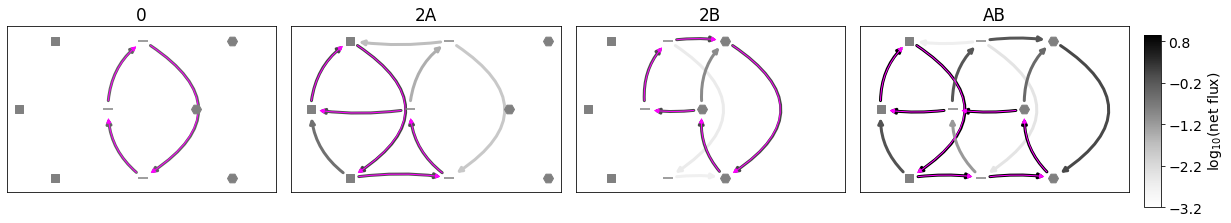

[773.09816747  21.57816176   1.           2.78217808]
[1.00000000e+04 7.95061898e+01 1.00000000e+00 4.96543207e+02]
[1.00000000e+04 7.95061898e+01 1.00000000e+00 4.96543207e+02]
[2.91971069e+01 7.41278852e+01 1.04440723e+03 1.95985731e+03
 1.00000000e+00 1.00000000e+04]
[1.00000000e+00 2.89470046e+03 6.27575806e+02 4.42629501e+00
 3.76359107e+02 1.59244349e+02]
[0.4055086263462819, 3.2682666753787553, [2.4537938786164424, 20.335259593073925, 2.7955912838103565, 26.935186121923444]]


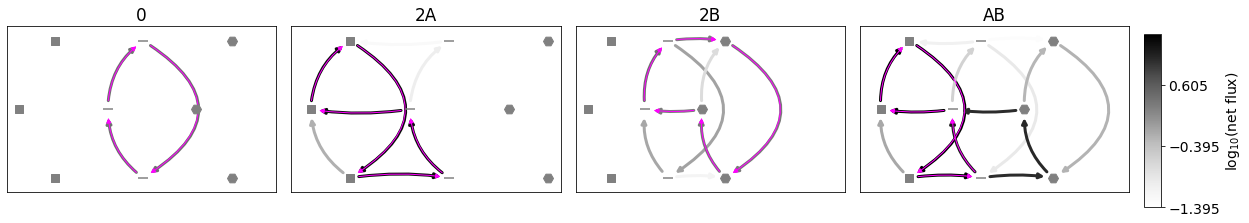

[28.88640876 21.57816176  1.          2.78217808]
[1.00000000e+04 7.95061898e+01 1.00000000e+00 4.96543207e+02]
[1.00000000e+04 7.95061898e+01 1.00000000e+00 4.96543207e+02]
[2.91971069e+01 7.41278852e+01 1.04440723e+03 1.95985731e+03
 1.00000000e+00 1.00000000e+04]
[1.00000000e+00 1.06992930e+03 6.27575806e+02 4.42629501e+00
 3.76359107e+02 1.59244349e+02]
[0.3954574231441227, 3.295305593844437, [2.208309734695059, 21.024622823559934, 2.8170005459476806, 27.654942497264592]]


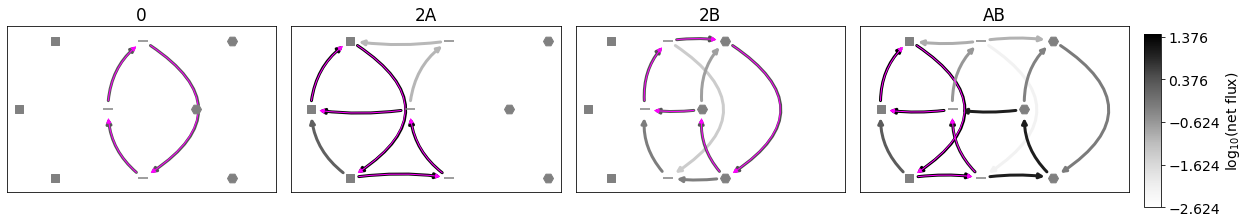

[ 1.          1.73142394  1.         68.78613445]
[136.56377211  10.97260472   1.         286.69538137]
[136.56377211  10.97260472   1.         286.69538137]
[1.00000000e+04 1.24870408e+03 1.00000000e+00 1.00000000e+04
 2.72941839e+00 1.96878337e+00]
[1.59551112e+00 2.27618055e+01 1.32980858e+03 1.16963174e+00
 4.16213251e+03 6.25663575e+01]
[1.4967538611445794, 3.3009654382485607, [0.6224189346085143, 3.2548474134637355, 0.931984802438833, 9.185407796922282]]


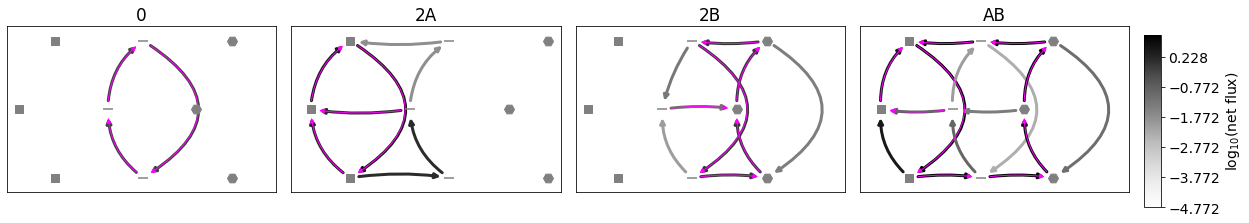

[70.24215722  1.6860918   1.         12.84416883]
[1.00000000e+04 1.23486779e+02 1.00000000e+00 3.77741369e+01]
[1.00000000e+04 1.23486779e+02 1.00000000e+00 3.77741369e+01]
[1.00000000e+00 4.07286411e+03 1.51740507e+03 1.10749307e+03
 4.25315576e+01 3.74195256e+01]
[10000.         10000.            53.03312999  2289.89120471
  1457.82358525 10000.        ]
[0.2536884808358055, 3.3325502943386924, [1.4571126785747872, 14.199818602681269, 1.680556191011818, 16.929753655959082]]


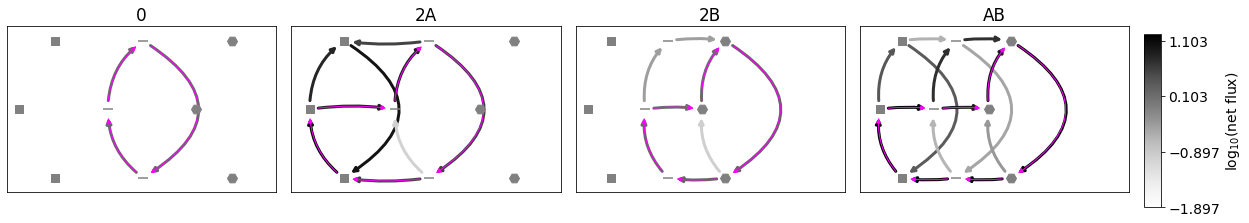

[3.77695619e+03 8.74013961e+00 2.72869523e+03 1.00000000e+00]
[10000.            24.74013696  2728.69522794    17.02352983]
[10000.            24.74013696  2728.69522794    17.02352983]
[1.00000000e+04 1.00000000e+00 4.22067746e+03 7.08191905e+00
 1.99370822e+00 1.00000000e+04]
[1.00000000e+00 1.00000000e+04 3.06478876e+00 1.31915745e+03
 3.68892968e+01 1.00000000e+00]
[0.5065395970090182, 3.3400903917379443, [0.5443248608298966, 4.868322480227025, 0.6829604506052589, 6.916126865016833]]


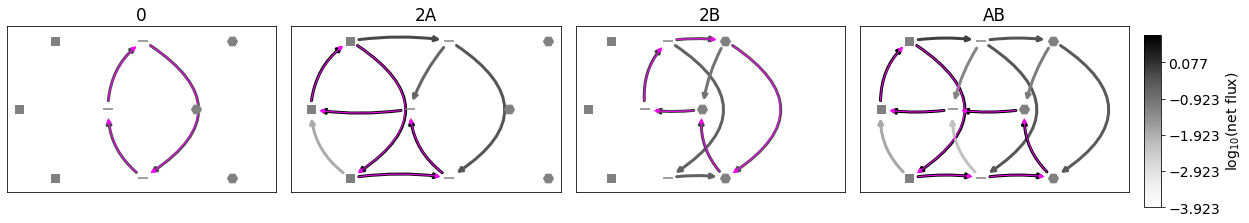

[ 1.         1.        15.3317231  1.       ]
[17.60724127  2.14427249  1.          1.        ]
[17.60724127  2.14427249  1.          1.        ]
[8.50127516e+03 3.57340427e+00 1.00000000e+00 1.86043616e+03
 1.00000000e+00 1.00000000e+04]
[1.e+00 1.e+04 1.e+00 1.e+00 1.e+04 1.e+00]
[0.4054893722077011, 3.4213941479298713, [0.054550245743327286, 0.4622282933337703, 0.05714506405789533, 0.6122389977886049]]


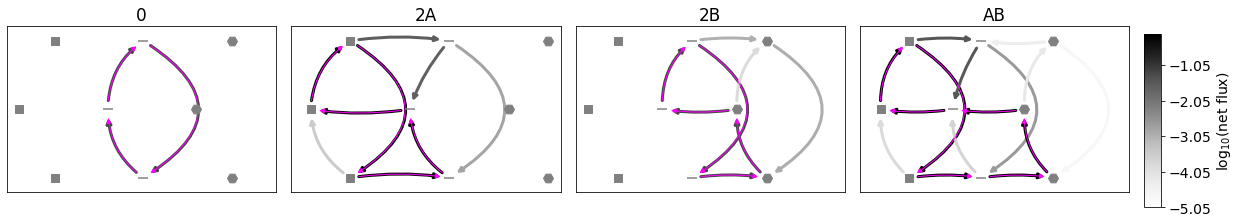

[1.00000000e+04 1.07072533e+00 3.57835126e+01 3.14363167e+00]
[1.00000000e+04 1.07072533e+03 1.99588414e+00 7.87826214e+01]
[1.00000000e+04 1.07072533e+03 1.99588414e+00 7.87826214e+01]
[1.02290221e+02 1.12350941e+03 1.77591277e+03 1.42934566e+01
 1.34060664e+00 1.00000000e+04]
[6.46341565e+00 5.40539727e+03 7.35030404e+01 7.79112659e+01
 1.00000000e+04 3.27483718e+02]
[3.183105877571851, 3.4242275952812014, [0.7979011733828405, 3.645733888121331, 3.084608816210344, 33.1127548383283]]


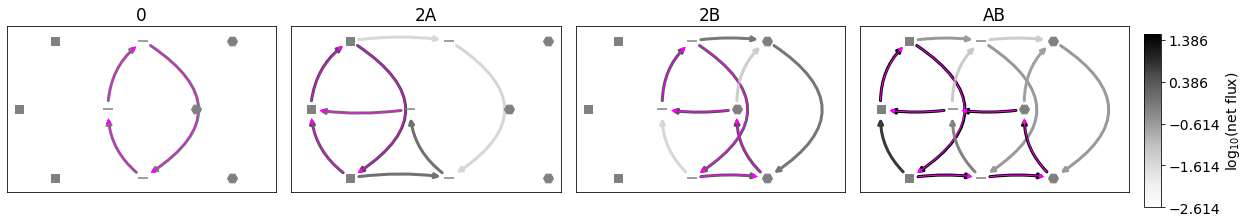

[1.e+00 1.e+00 1.e+00 1.e+04]
[1.42051664e+01 5.74204261e+01 1.00000000e+00 1.00000000e+04]
[1.42051664e+01 5.74204261e+01 1.00000000e+00 1.00000000e+04]
[1.00000000e+00 1.36803175e+03 2.04985831e+03 1.00000000e+00
 5.19660271e+03 1.84356346e+03]
[1.07269353e+03 3.98177833e+01 1.00000000e+00 3.87221600e+02
 6.81831659e+00 5.61793644e+00]
[3.365970921723974, 3.418843150045114, [0.49995000499950004, 1.0797104147258239, 1.040857231482737, 11.131802756562402]]


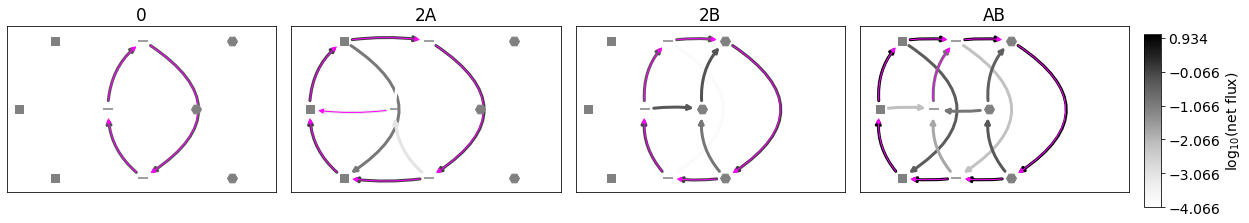

[ 80.72511757  18.28927765 647.42507538  22.23524557]
[439.07088132 219.92433925  26.59680239  97.96538192]
[439.07088132 219.92433925  26.59680239  97.96538192]
[2.91971069e+01 1.21144504e+00 1.00000000e+00 1.05690801e+01
 1.00000000e+00 1.00000000e+04]
[1.00000000e+00 1.00000000e+04 1.00000000e+04 2.45883674e+01
 5.88390647e+02 3.02888640e+01]
[0.8202182852298555, 3.4601149134058593, [2.11536260734988, 14.82504860085733, 2.3785268332046963, 26.176189897436142]]


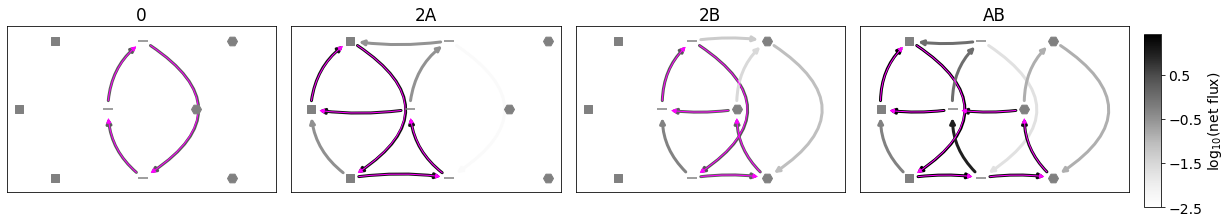

[1248.19558692    3.68724661    1.71679008    2.76799181]
[1.24819559e+03 8.05508408e+01 1.00000000e+00 7.70454728e+01]
[1.24819559e+03 8.05508408e+01 1.00000000e+00 7.70454728e+01]
[3.40114475e+03 1.53710489e+03 1.00000000e+00 1.05921286e+03
 1.00000000e+00 1.00000000e+04]
[1.00000000e+00 6.83262969e+01 2.46173005e+02 7.39808706e+03
 5.24173328e+02 2.10020157e+00]
[2.648389183496321, 3.5034323619944217, [1.5778448369841036, 4.846330923455363, 2.6792881393392736, 30.384888730384716]]


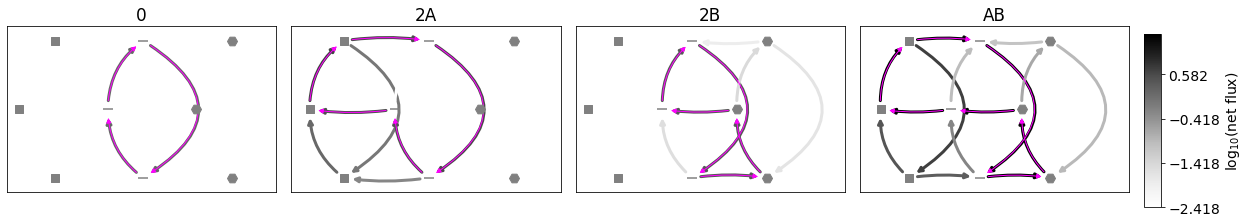

[24.39501373  1.          5.55887523  1.        ]
[ 208.92612298 1000.            5.55887523   17.02352983]
[ 208.92612298 1000.            5.55887523   17.02352983]
[1.00000000e+00 1.00000000e+04 4.72725455e+01 1.85147612e+03
 4.12767399e+03 7.01607511e+02]
[ 500.53092665   33.57937116  244.36380791   46.03532892   36.06711682
 1955.73529593]
[3.0327034574107765, 3.5039947448192477, [0.4407497266392097, 1.5079636260490217, 1.0877223485819294, 12.340295930805416]]


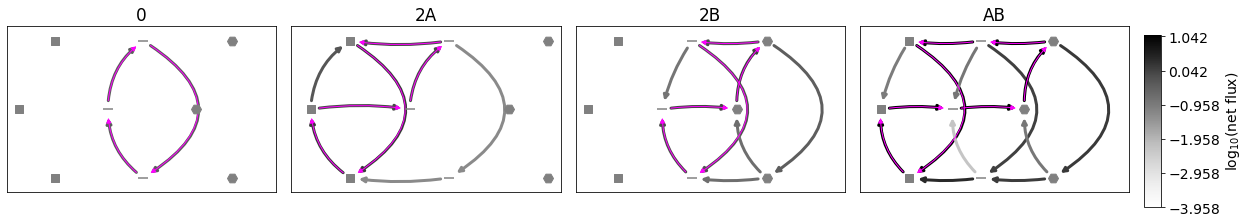

In [38]:
for case in ["sameAD_difbnp","sameAD_difbp"]:
    print(case)
    files=glob.glob(boundaries_folder+"/mat_%s_fcd=0.001_fcu=1000_fc1=10_fc2=10*"%case)
    fig,axes=plt.subplots(2,6,figsize=(15,4))
    for fnum,f in enumerate(files):
        mat=np.load(f)
        ax=axes[fnum//6][fnum%6]
        ax.imshow(mat,origin="lower",cmap=plt.cm.Greys,extent=[col_ar[0],col_ar[-1],row_ar[0],row_ar[-1]])
    plt.tight_layout()
    plt.show()


    #pick one and check parameter sets
    f=files[0]
    mat=np.load(f)
    matpars=np.load(f.replace("mat","mat_pars"))
    np.random.seed(1)
    n=0
    for r in range(len(mat)):
        for c in range(len(mat)):
            if mat[r,c]>0 and col_ar[c]>0.05 and row_ar[r]>0.05:
                if case=="sameAD_difbp":
                    if np.random.uniform()>0.99:
                        cont=True
                    else:
                        cont=False
                else:
                    cont=True
                if cont:
                    parset=matpars[r,c].copy()
                    fullpars=return_fullparset(parset,case)
                    print(fullpars[0:4])
                    print(fullpars[4:8])
                    print(fullpars[8:12])
                    print(fullpars[12:12+6])
                    print(fullpars[12+6:])
                    makeplot(fullpars)
                    n+=1
            if n>50:
                break
            

In [26]:
fc1=10
fc2=10
minb=0
maxb=4
parfc=3
alldfs=[]


green="#c6cdad"
blue="#d3dbe4"
red="#e3cbc8"

green2="#b1bc8c"
blue2="#a6bed8"

colnames=["p%d"%i for i in range(1,25)]
colnames=colnames+["SAB","SBA","m0","mA","mB","mAB","quadrant"]

case="sameAD_difbp"
files=glob.glob(boundaries_folder+"/mat_%s_fcd=0.001_fcu=1000_fc1=10_fc2=10*"%case)
allrows=[]
for fnum,f in enumerate(files):
    mat=np.load(f)
    matpars=np.load(f.replace("mat","mat_pars"))
    for r in range(len(mat)):
        for c in range(len(mat[0])):
            if mat[r,c]>0:
                parset=matpars[r,c].copy()
                fullpars=return_fullparset(parset,case)
                SAB,SBA,mstars=basic.compute_synergy(fullpars,PolAB_A_allpars.interface_GRF_PolAB_A_A,returnm=True,anystronger=True)
                if mstars[2]>mstars[1]:
                    #change order
                    SAB_=SAB
                    SAB=SBA
                    SBA=SAB_
                    m0=mstars[0]
                    mA=mstars[2]
                    mB=mstars[1]
                    mAB=mstars[3]
                else:
                    m0,mA,mB,mAB=mstars

                if SAB>0 and SBA>0:
                    quadrant=1
                elif SAB<0 and SBA>0:
                    quadrant=2
                else:
                    quadrant=3
                allrows.append(list(fullpars)+[SAB,SBA]+[m0,mA,mB,mAB]+[quadrant])
df=pd.DataFrame(data=allrows,columns=colnames)

display(df.head())


p1        p2         p3          p4          p5           p6   p7  \
0  962.951424  8.813334  10.630598  149.957979  962.951424  8813.334354  1.0   
1  962.951424  8.813334   7.405939  149.957979  962.951424  8813.334354  1.0   
2  962.951424  8.813334  10.630598  149.957979  962.951424  8813.334354  1.0   
3  962.951424  8.813334  10.630598  149.957979  962.951424  8813.334354  1.0   
4  962.951424  8.827503   9.827796  149.957979  962.951424  8827.502565  1.0   

            p8          p9          p10  ...       p22        p23      p24  \
0  2002.379045  962.951424  8813.334354  ...  1.000000  3150.7326  10000.0   
1  2002.379045  962.951424  8813.334354  ...  1.000000  3150.7326  10000.0   
2  2002.379045  962.951424  8813.334354  ...  1.000000  3150.7326  10000.0   
3  2002.379045  962.951424  8813.334354  ...  6.815611  3150.7326  10000.0   
4  2002.379045  962.951424  8827.502565  ...  1.388267  3150.7326  10000.0   

        SAB       SBA        m0         mA         mB        mAB  quadrant  
0 -1.050340 -0.975541  8.247759  82.474262  78.307170  39.823045         3  
1 -1.047247 -0.975755  8.249278  82.281793  78.303757  39.815388         3  
2 -1.013802 -0.975571  8.247759  80.341673  78.240584  39.788359         3  
3 -0.992443 -0.975758  8.247759  79.218058  78.307170  39.817058         3  
4 -1.128722 -0.951412  8.260545  82.547612  73.001028  37.750729         3  

[5 rows x 31 columns]

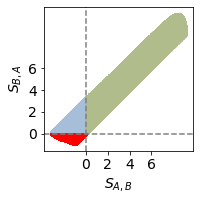

In [27]:

fig,ax=plt.subplots(1,1,figsize=(3,3))
mask1=df["quadrant"]==1
mask2=df["quadrant"]==2
mask3=df["quadrant"]==3
ax.scatter(df["SAB"].values[mask2],df["SBA"].values[mask2],s=3,color=blue2)
ax.scatter(df["SAB"].values[mask1],df["SBA"].values[mask1],s=3,color=green2)
ax.scatter(df["SAB"].values[mask3],df["SBA"].values[mask3],s=3,color="red")
ax.set_xlabel('$S_{A,B}$')
ax.set_ylabel('$S_{B,A}$')
ax.axhline(y=0,linestyle="--",color="gray")
ax.axvline(x=0,linestyle="--",color="gray")
ax.set_xticks(np.arange(0,7,2))
ax.set_yticks(np.arange(0,7,2))
plt.tight_layout()
plt.show()

In [28]:
rhofunc=PolAB_A_allpars.interface_rhos_GRF_PolAB_A_A
min_nflog=-13
node0=2
plotting=True
nit=1000000
paths_dict=dict()

constraints=[0,4,3]
minb,maxb,parfc=constraints
fc1,fc2=[10,10]
alllabls=[]
allsubsets=[]
allmatd=[]

green="#c6cdad"
blue="#d3dbe4"
red="#e3cbc8"

xlim=10
ylim=12
cmapgreys=truncate_colormap(plt.cm.Greys,minval=0.2,maxval=1.0)


percent=0.90

#Plot distribution of synergies per most dominant paths, irrespective of the quadrant.



subset=df[df["SAB"]>0.001]#focus on positive synergy only
subset=subset[::50]
print(len(subset))

7240


[0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1.]
['0-3.AB' '2-8.AB' '3-5.AB' '5-2.AB' '6-0.AB' '7-6.AB' '8-7.AB']


<ipython-input-29-0b2fd95bc4ba>:54: RuntimeWarning: divide by zero encountered in log10
  matnfi=np.log10(smat_)


path 27, 2742 instances
[0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.]
['0-6.AB' '2-5.AB' '3-0.AB' '4-3.AB' '5-4.AB' '6-8.AB' '8-2.AB']
path 13, 1053 instances
[0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
['1-7.AB' '2-5.AB' '4-1.AB' '5-4.AB' '6-8.AB' '7-6.AB' '8-2.AB']
path 3, 333 instances
[0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.]
['0-3.AB' '1-7.AB' '2-1.AB' '3-5.AB' '4-1.AB' '5-4.AB' '6-0.AB' '7-6.AB']
path 33, 331 instances
[0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]
['1-4.AB' '2-8.AB' '3-5.AB' '4-3.AB' '5-2.AB' '7-1.AB' '8-7.AB']
path 9, 282 instances
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1.]
['2-8.AB' '6-8.AB' '7-6.AB' '8-7.AB']
path 0, 274 instances
[0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1.]
['0-3.AB' '1-7.AB' '2-8.AB' '3-5.AB' '4-1.AB' '5-4.AB' '6-0.AB' '7-6.AB'
 '8-7.AB']
path 29, 270 instances
[0. 0

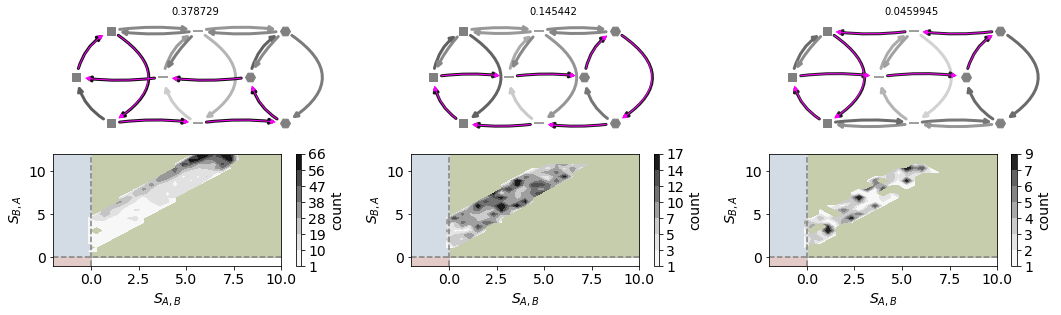

3 1 0
[1, 2, 3, 4, 6, 7, 8, 10]
4 1 1
[1, 2, 4, 6, 8, 10, 12, 14]
5 1 2
[1, 3, 5, 7, 9, 11, 13, 16]


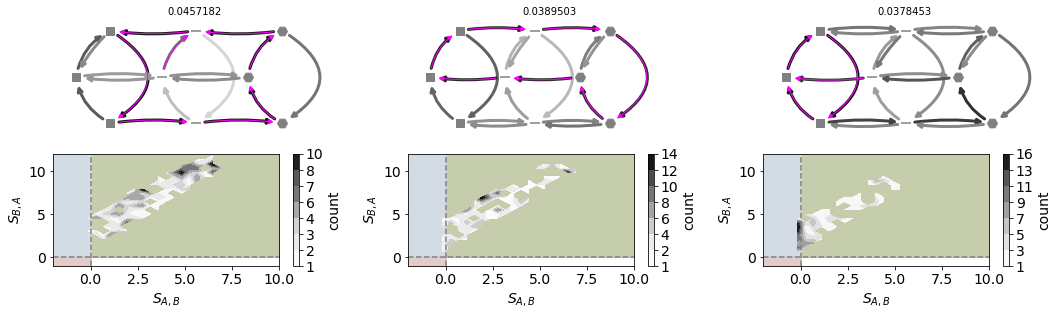

6 2 0
[1, 3, 5, 7, 9, 11, 13, 16]
7 2 1
[1, 2, 4, 6, 8, 10, 12, 14]
8 2 2
[1, 2, 4, 5, 7, 8, 10, 12]


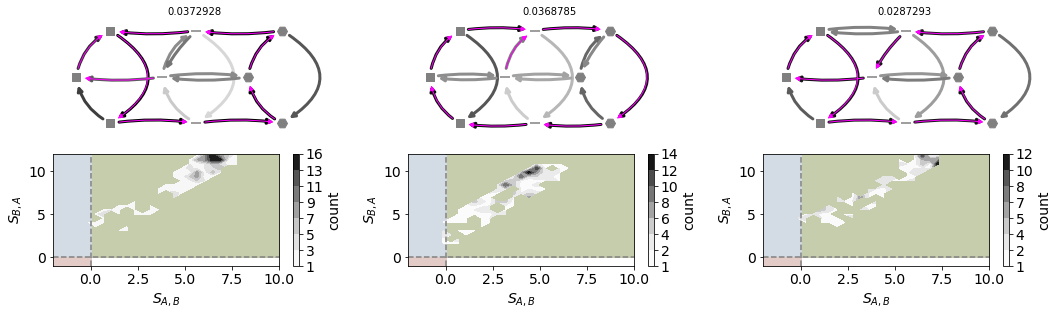

9 3 0
[1, 2, 3, 5, 6, 8, 9, 11]
10 3 1
[1, 2, 4, 6]
11 3 2
[1, 2, 3, 5]


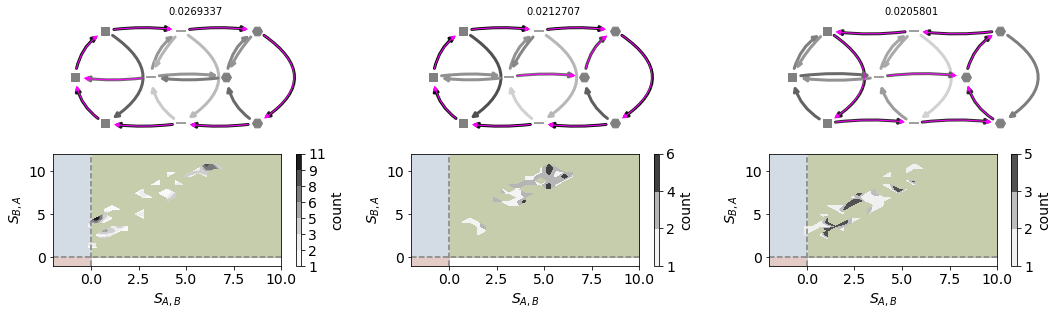

12 4 0
[1, 2, 4, 6]
13 4 1
[1, 2, 4, 6]


<ipython-input-29-0b2fd95bc4ba>:206: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


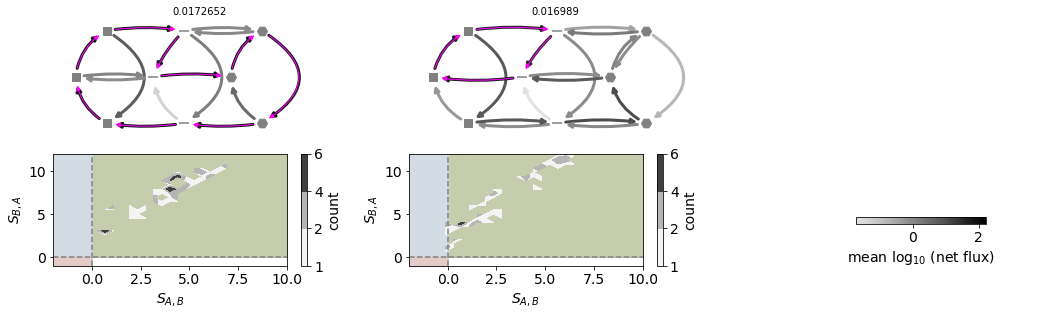

In [29]:
#plot paths for points in positive synergy, note that I am not unifying the mirror paths

smatall,labls_=fluxes.get_mat_fluxes_abonly(subset,all_fnames,netJ=True,rhofunc=rhofunc,graph_edges=edges_)
alllabls.append(labls_)
mat_dominant_paths_all=fluxes.get_dominant_paths_mat_v4(smatall,labls_,node0)
allmatd.append(mat_dominant_paths_all)


#2. select sample, in this case all points
subset2=subset
SAB_values=subset2['SAB'].values
SBA_values=subset2['SBA'].values
quadrants=subset2["quadrant"].values
#plt.scatter(subset2["SAB"],subset2["SBA"])
#plt.show()
smat=smatall #[mask]
mat_dominant_paths=mat_dominant_paths_all #[mask]

result=np.unique(mat_dominant_paths,axis=0,return_inverse=True,return_counts=True)

unique_paths,idxsup,countup=result
total=np.sum(countup)
argsort=np.argsort(countup)[::-1]
counts_sorted=countup[argsort]
#print(countup[argsort])


m_allGs=[] #graphs for each instance with the dominant path
dominantG=[] #dominant graphs
corresponding_synergies=[] #corresponding synergies for each path
percentage_positive=[]
cumsum=np.cumsum(counts_sorted)
threshold=np.where(cumsum>percent*total)[0][0]
#print(cumsum)
#print('total', total,percent*total,'threshold',threshold,countup[argsort[0:threshold]], '+1?', countup[argsort[0:threshold+1]])
if threshold==0:
    threshold=1

for inum,i in enumerate(argsort[0:threshold]):
    #print(inum)
    #get correaponding graph for each path

    path=unique_paths[i]

    print(path)
    print(np.array(labls_)[np.asarray(path,dtype=bool)])
    original_idxs=np.where(idxsup==i)[0] #positions where this path was
    quadrants_p=quadrants[original_idxs]
    #print("count is,", countup[i], "original indexes len is", len(original_idxs))
    #find fluxes corresponding to this path
    #smat_=smat[quadrants==q+1].copy()
    smat_=smat[original_idxs].copy()

    matnfi=np.log10(smat_)
    matnfi[matnfi<min_nflog]=min_nflog


    #get graphs that share this dominant path
    all_Gs=[]
    for row in matnfi:
        #Gs=[]
        J=row
        edgelabls=labls_
        G=fluxes.get_graph_fromJarray(J,edgelabls,min_=min_nflog)

        #Gs.append(G)
        #all_Gs.append(Gs)

        all_Gs.append(G)
    common_U=fluxes.merge_graphs(all_Gs)
    dominant=fluxes.get_dominant_path_G(G,node0) #since all have the same dominant path, use the last one
    m_allGs.append(common_U)
    dominantG.append(dominant)
    #allranks[q][pc].append([path,countup[i],all_Gs])
    #mask=(quadrants==q+1)
    SABoriginal=SAB_values[original_idxs]
    SBAoriginal=SBA_values[original_idxs]
    print('path %d, %d instances'%(i,len(original_idxs)))

    corresponding_synergies.append([SABoriginal,SBAoriginal])
    percentage_positive.append(np.sum(SABoriginal>0)/len(SABoriginal))


#plot
m=5
max_nflog=np.log10(np.max(smat))
#cmap=plt.cm.summer_r
cmap=plt.cm.Greys



#gs=mpl.gridspec.GridSpec(6*nr,nc)

#fig.suptitle("%s,percent %g"%(title,percent),y=1.05)


mins=[min([G[e[0]][e[1]]["weight"] for e in G.edges]) for G in m_allGs]
minv=min(mins)

maxs=[max([G[e[0]][e[1]]["weight"] for e in G.edges]) for G in m_allGs]
maxv=max(maxs)


nr=2
nc=3

neworder=[]
#first find the ones with percentage_positive < 0.5
for i,item_ in enumerate(percentage_positive):
    if item_>=0.5:
        neworder.append(i)
print("first items", len(neworder))
for i,item_ in enumerate(percentage_positive):
    if item_<0.5:
        neworder.append(i)
pltnum=1
for i,inum in enumerate(neworder):

    row=i//nc
    col=i%nc
    if col==0:
        if i>0:
            plt.tight_layout()
            #plt.savefig("figs/fluxessuppl%d.pdf"%pltnum,bbox_inches="tight")
            plt.show()
            pltnum+=1
        fig,axes=plt.subplots(nr,nc,figsize=(5*nc,2.3*nr))
    print(i,row,col)
    ax=axes[0,col]
    #ax=fig.add_subplot(gs[row:row+5,col:col+1]) #axes_[2*row][col]
    ax.set_title("%g"%(counts_sorted[inum]/total),fontsize=10)
    #print(inum)

    #In this case graphs may have different connectivity
    G=m_allGs[inum]
    colors_=[G[e[0]][e[1]]["weight"] for e in G.edges]
    G2=dominantG[inum]
    #print(minv,colors_w)
    fluxes.plot_graphs([G],[ax],coords=coords,color_lists=[colors_],dominant=[G2],color_args={"edge_cmap":cmapgreys,"edge_vmin":minv,"edge_vmax":maxv,"width":3},colord="magenta")
    ax.set_frame_on(False)
    #cax=fig.add_axes([1,0.6,0.01,0.3])
    #norm = mpl.colors.Normalize(vmin=minv,vmax=maxv)
    #cwidth=0.85/nc
    #cax=fig.add_axes([(col)*(1/nc)+cwidth,1-row*1/nr,0.01,0.9/nr])
    #cb=mpl.colorbar.ColorbarBase(cmap=cmapgreys,norm=norm,ax=cax,orientation='vertical',label="mean\n$\log_{10}$ (net flux)",ticks=[-0.5,0,1])
    #cb.ax.set_yticks()
    #cb.yaxes.set_ylabel()

    ax=axes[1,col]
    #ax=fig.add_subplot(gs[6*row+5:,col:col+1])
    #patch=plt.Polygon([[0,0],[5,0],[5,5],[0,5]],color=green)
    #ax.add_patch(patch)
    ax.fill_between([0,xlim],0,ylim,color=green)
    ax.fill_between([-2,0],0,ylim,color=blue)
    ax.fill_between([-2,0],0,-1,color=red)
    x=corresponding_synergies[inum][0]
    y=corresponding_synergies[inum][1]
    H,xbins,ybins=np.histogram2d(y,x,bins=[np.linspace(-2,xlim,30),np.linspace(-2,ylim,30)])
    mask=H<1
    #mask1=
    cmap1=plt.cm.Greys
    #cmap1.set_under(green)
    #cmap1.set_bad(green)
    #ax.contourf(H,8,extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],origin="lower",cmap=cmap1,zorder=2)
    levels=list(map(int,np.linspace(1,np.max(H),8)))
    if len(levels)>len(set(levels)):
        levels=list(map(int,np.linspace(1,np.max(H),4)))
    print(levels)
    cf=ax.contourf(np.ma.masked_array(H,mask=mask),levels,extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],vmin=1,origin="lower",cmap=cmap1,zorder=2)
    plt.colorbar(cf,ax=ax,label="count")
    #contours.append(cf)
    #ax.imshow(np.ma.masked_array(H,mask=mask),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],origin="lower",cmap=cmap1,zorder=2)
    #sns.kdeplot(*corresponding_synergies[inum],ax=ax,shade=True,cbar=True,cmap=plt.cm.Greys)
    ax.axvline(x=0,linestyle="--",color="gray",zorder=2)
    ax.axhline(y=0,linestyle="--",color="gray",zorder=2)
    ax.set_xlabel(r'$S_{A,B}$')
    ax.set_ylabel(r'$S_{B,A}$')
    ax.set_xlim(-2,xlim)
    ax.set_ylim(-1,ylim)

#plt.tight_layout()
#plt.show()
#norm = mpl.colors.Normalize(vmin=minv,vmax=maxv)
#mpl.colorbar.ColorbarBase(cmap=cmap,norm=norm,ax=cax,orientation='vertical')
#cax.set_ylabel()
#inum=11
#row=inum//nc
#col=inum%nc
#fig,ax=plt.subplots(1,1,)
ax=axes[0,2]
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])

ax=axes[1,2]
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])


cax=fig.add_axes([0.8,0.3,0.12,0.02])
norm = mpl.colors.Normalize(vmin=minv,vmax=maxv)
mpl.colorbar.ColorbarBase(cmap=cmapgreys,norm=norm,ax=cax,orientation='horizontal',label="mean $\log_{10}$ (net flux)")
#cax.set_ylabel("count")

plt.tight_layout()
#plt.savefig("figs/fluxessuppl%d.pdf"%pltnum,bbox_inches="tight")
plt.show()

It is clear that cycling occurs.